# Import Library

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import networkx as nx
from tqdm import trange

# Load Dataset

In [2]:
data = pd.read_csv('unicorn.csv')

# Data Preprocessing

## Data Extraction

In [3]:
# Drop companies without investors
data = data.dropna(subset='Investors')

# Split investor column, separated by comma
investors = data['Investors'].str.rsplit(pat=',', n=- 1, expand=True)
df_unicorn = pd.concat([data[data.columns[:-1]], investors], axis=1)
df_unicorn = df_unicorn.rename(
    columns={0: 'Investor1', 1: 'Investor2', 2: 'Investor3', 3: 'Investor4'})
display(df_unicorn)

Company Valuation ($B) Date Joined        Country  \
0               ByteDance           $140    4/7/2017          China   
1                  SpaceX           $127   12/1/2012  United States   
2                   SHEIN           $100    7/3/2018          China   
3                  Stripe            $95   1/23/2014  United States   
4                   Canva            $40    1/8/2018      Australia   
...                   ...            ...         ...            ...   
1181          LeadSquared             $1   6/21/2022          India   
1182            FourKites             $1   6/21/2022  United States   
1183          VulcanForms             $1    7/5/2022  United States   
1184          SingleStore             $1   7/12/2022  United States   
1185  Unstoppable Domains             $1   7/27/2022  United States   

              City                              Industry  \
0           Beijing              Artificial intelligence   
1         Hawthorne                                Other   
2          Shenzhen      E-commerce & direct-to-consumer   
3     San Francisco                              Fintech   
4       Surry Hills         Internet software & services   
...             ...                                  ...   
1181      Bengaluru         Internet software & services   
1182        Chicago  Supply chain, logistics, & delivery   
1183     Burlington  Supply chain, logistics, & delivery   
1184  San Francisco          Data management & analytics   
1185      Las Vegas         Internet software & services   

                       Investor1                 Investor2  \
0          Sequoia Capital China      SIG Asia Investments   
1                  Founders Fund   Draper Fisher Jurvetson   
2        Tiger Global Management     Sequoia Capital China   
3                Khosla Ventures          LowercaseCapital   
4          Sequoia Capital China        Blackbird Ventures   
...                          ...                       ...   
1181       Gaja Capital Partners         Stakeboat Capital   
1182  Hyde Park Venture Partners     Bain Capital Ventures   
1183            Eclipse Ventures       D1 Capital Partners   
1184             Google Ventures                     Accel   
1185                    Boost VC         Draper Associates   

                      Investor3        Investor4  
0                    Sina Weibo   Softbank Group  
1           Rothenberg Ventures             None  
2      Shunwei Capital Partners             None  
3                      capitalG             None  
4               Matrix Partners             None  
...                         ...              ...  
1181         WestBridge Capital             None  
1182           Hyde Park Angels             None  
1183          Industry Ventures             None  
1184            Data Collective             None  
1185                   Gaingels             None  

[1168 rows x 10 columns]

In [4]:
df_invest = df_unicorn.copy()

# Apply standardize_name function to investor columns only
investor_columns = ['Investor1', 'Investor2', 'Investor3', 'Investor4']

df_investor = df_invest[['Company', 'Investor1',
                         'Investor2', 'Investor3', 'Investor4']]
df_startup = pd.melt(df_investor, id_vars='Company', value_name='Investor')

df_info = df_invest[df_invest.columns[:-4]]

## Data Cleaning

In [5]:
df_clean = df_info.merge(df_startup[['Company', 'Investor']]).dropna()
df_clean.columns = ['Company', 'Valuation ($B)', 'Date Joined', 'Country',
                    'City', 'Industry', 'Investor']
df_clean = df_clean.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_clean = df_clean.replace('', np.nan).dropna()

# Split rows with . as separator
row_to_split = df_clean.loc[516]
investors = row_to_split['Investor'].split('. ')
investor_df = pd.DataFrame({
    'Company': [row_to_split.Company] * len(investors),
    'Valuation ($B)': [row_to_split['Valuation ($B)']] * len(investors),
    'Date Joined': [row_to_split['Date Joined']] * len(investors),
    'Country': [row_to_split.Country] * len(investors),
    'City': [row_to_split['City']] * len(investors),
    'Industry': [row_to_split.Industry] * len(investors),
    'Investor': investors})

df_clean = df_clean.drop(516)
df_clean = pd.concat([df_clean, investor_df]).reset_index(drop=True)

# Split rows with . as separator
row_to_split = df_clean.loc[684]
investors = row_to_split['Investor'].split('. ')
investor_df = pd.DataFrame({
    'Company': [row_to_split.Company] * len(investors),
    'Valuation ($B)': [row_to_split['Valuation ($B)']] * len(investors),
    'Date Joined': [row_to_split['Date Joined']] * len(investors),
    'Country': [row_to_split.Country] * len(investors),
    'City': [row_to_split['City']] * len(investors),
    'Industry': [row_to_split.Industry] * len(investors),
    'Investor': investors})

df_clean = df_clean.drop(684)
df_clean = pd.concat([df_clean, investor_df]).reset_index(drop=True)

# Split rows with . as separator
row_to_split = df_clean.loc[1102]
investors = row_to_split['Investor'].split('. ')
investor_df = pd.DataFrame({
    'Company': [row_to_split.Company] * len(investors),
    'Valuation ($B)': [row_to_split['Valuation ($B)']] * len(investors),
    'Date Joined': [row_to_split['Date Joined']] * len(investors),
    'Country': [row_to_split.Country] * len(investors),
    'City': [row_to_split['City']] * len(investors),
    'Industry': [row_to_split.Industry] * len(investors),
    'Investor': investors})

df_clean = df_clean.drop(1102)
df_clean = pd.concat([df_clean, investor_df]).reset_index(drop=True)

# Split rows with . as separator
row_to_split = df_clean.loc[1333]
investors = row_to_split['Investor'].split('. ')
investor_df = pd.DataFrame({
    'Company': [row_to_split.Company] * len(investors),
    'Valuation ($B)': [row_to_split['Valuation ($B)']] * len(investors),
    'Date Joined': [row_to_split['Date Joined']] * len(investors),
    'Country': [row_to_split.Country] * len(investors),
    'City': [row_to_split['City']] * len(investors),
    'Industry': [row_to_split.Industry] * len(investors),
    'Investor': investors})

df_clean = df_clean.drop(1333)
df_clean = pd.concat([df_clean, investor_df]).reset_index(drop=True)

# Split rows with . as separator
row_to_split = df_clean.loc[1641]
investors = row_to_split['Investor'].split('. ')
investor_df = pd.DataFrame({
    'Company': [row_to_split.Company] * len(investors),
    'Valuation ($B)': [row_to_split['Valuation ($B)']] * len(investors),
    'Date Joined': [row_to_split['Date Joined']] * len(investors),
    'Country': [row_to_split.Country] * len(investors),
    'City': [row_to_split['City']] * len(investors),
    'Industry': [row_to_split.Industry] * len(investors),
    'Investor': investors})

df_clean = df_clean.drop(1641)
df_clean = pd.concat([df_clean, investor_df]).reset_index(drop=True)

# Split rows with . as separator
row_to_split = df_clean.loc[2479]
investors = row_to_split['Investor'].split('. ')
investor_df = pd.DataFrame({
    'Company': [row_to_split.Company] * len(investors),
    'Valuation ($B)': [row_to_split['Valuation ($B)']] * len(investors),
    'Date Joined': [row_to_split['Date Joined']] * len(investors),
    'Country': [row_to_split.Country] * len(investors),
    'City': [row_to_split['City']] * len(investors),
    'Industry': [row_to_split.Industry] * len(investors),
    'Investor': investors})

df_clean = df_clean.drop(2479)
df_clean = pd.concat([df_clean, investor_df]).reset_index(drop=True)

# Split rows with . as separator
row_to_split = df_clean.loc[2522]
investors = row_to_split['Investor'].split('. ')
investor_df = pd.DataFrame({
    'Company': [row_to_split.Company] * len(investors),
    'Valuation ($B)': [row_to_split['Valuation ($B)']] * len(investors),
    'Date Joined': [row_to_split['Date Joined']] * len(investors),
    'Country': [row_to_split.Country] * len(investors),
    'City': [row_to_split['City']] * len(investors),
    'Industry': [row_to_split.Industry] * len(investors),
    'Investor': investors})

df_clean = df_clean.drop(2522)
df_clean = pd.concat([df_clean, investor_df]).reset_index(drop=True)

# Split rows with . as separator
row_to_split = df_clean.loc[2934]
investors = row_to_split['Investor'].split('. ')
investor_df = pd.DataFrame({
    'Company': [row_to_split.Company] * len(investors),
    'Valuation ($B)': [row_to_split['Valuation ($B)']] * len(investors),
    'Date Joined': [row_to_split['Date Joined']] * len(investors),
    'Country': [row_to_split.Country] * len(investors),
    'City': [row_to_split['City']] * len(investors),
    'Industry': [row_to_split.Industry] * len(investors),
    'Investor': investors})

df_clean = df_clean.drop(2934)
df_clean = pd.concat([df_clean, investor_df]).reset_index(drop=True)

# Split rows with . as separator
row_to_split = df_clean.loc[2432]
investors = row_to_split['Investor'].split('m ')
investor_df = pd.DataFrame({
    'Company': [row_to_split.Company] * len(investors),
    'Valuation ($B)': [row_to_split['Valuation ($B)']] * len(investors),
    'Date Joined': [row_to_split['Date Joined']] * len(investors),
    'Country': [row_to_split.Country] * len(investors),
    'City': [row_to_split['City']] * len(investors),
    'Industry': [row_to_split.Industry] * len(investors),
    'Investor': investors})

df_clean = df_clean.drop(2432)
df_clean = pd.concat([df_clean, investor_df]).reset_index(drop=True)

# Replace names
df_clean.Investor = df_clean.Investor.replace('500 Startups', '500 Global')

# Standardize Company names
mask = df_clean['Investor'].str.contains('Accel', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Accel'

mask = df_clean['Investor'].str.contains('Activant', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Activant Capital'

mask = df_clean['Investor'].str.contains('Alibaba', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Alibaba Group'

mask = df_clean['Investor'].str.contains('Bain Capital', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Bain Capital'

mask = df_clean['Investor'].str.contains('Bank of China', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Bank of China'

mask = df_clean['Investor'].str.contains('Benhcmark', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Benchmark'

mask = df_clean['Investor'].str.contains(
    'China Everbright', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'China Everbright Limited'

mask = df_clean['Investor'].str.contains('Coatue', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Coatue Management'

mask = df_clean['Investor'].str.contains('D1', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'D1 Capital Partners'

mask = df_clean['Investor'].str.contains(
    'Draper Fisher Jurtson', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Draper Fisher Jurvetson'

mask = df_clean['Investor'].str.contains('EQT', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'EQT Ventures'

mask = df_clean['Investor'].str.contains(
    'Fidelity Investment', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Fidelity Investments'

mask = df_clean['Investor'] == 'Founders'
df_clean.loc[mask, 'Investor'] = 'Founders Fund'

mask = df_clean['Investor'].str.contains(
    'General Catalyst', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'General Catalyst'

mask = df_clean['Investor'].str.contains('Goldman', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Goldman Sachs'

mask = df_clean['Investor'].str.contains('Google', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Google'

mask = df_clean['Investor'].str.contains(
    'Highland Capital', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Highland Capital Management'

mask = df_clean['Investor'].str.contains('ICONIQ', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'ICONIQ Capital'

mask = df_clean['Investor'].str.contains('IDG Capital', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'IDG Capital'

mask = df_clean['Investor'].str.contains('Index', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Index Ventures'

mask = df_clean['Investor'].str.contains('Insight', case=True, na=False)
df_clean.loc[mask, 'Investor'] = 'Insight Partners'

mask = df_clean['Investor'].str.contains('JD', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'JD Capital Management'

mask = df_clean['Investor'].str.contains('K2VC', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'K2 Group'

mask = df_clean['Investor'].str.contains('K2 Ventures', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'K2 Group'

mask = df_clean['Investor'].str.contains('Kaalari', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Kalaari Capital'

mask = df_clean['Investor'].str.contains('Kleiner', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Kleiner Perkins'

mask = df_clean['Investor'].str.contains('Liberty', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Liberty Global Ventures'

mask = df_clean['Investor'].str.contains('Lightspeed', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Lightspeed Venture Capital'

mask = df_clean['Investor'].str.contains('Lowercase', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Lowercase Capital'

mask = df_clean['Investor'].str.contains('Matrix', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Matrix Partners'

mask = df_clean['Investor'].str.contains('Menlo', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Menlo Ventures'

mask = df_clean['Investor'].str.contains('Microsoft', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Microsoft'

mask = df_clean['Investor'].str.contains('Mithril', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Mithril'

mask = df_clean['Investor'].str.contains('Morningside', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Morningside Group'

mask = df_clean['Investor'].str.contains(
    'Nortzone Ventures', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Northzone Ventures'

mask = df_clean['Investor'].str.contains('QiMing', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Qiming Venture Partners'

mask = df_clean['Investor'].str.contains('SAIF', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'SAIF Partners'

mask = df_clean['Investor'].str.contains('Sequoia', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Sequoia Capital'

mask = df_clean['Investor'].str.contains('SoftBank', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'SoftBank Group'

mask = df_clean['Investor'].str.contains('Temasek', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Temasek'

mask = df_clean['Investor'].str.contains('Tencent', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Tencent'

mask = df_clean['Investor'].str.contains('Tiantu', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Tiantu Capital'

mask = df_clean['Investor'].str.contains('Tiger', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Tiger Global'

mask = df_clean['Investor'].str.contains('Trifecta', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Trifecta Capital'

mask = df_clean['Investor'].str.contains('Vertex', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Vertex Ventures'

mask = df_clean['Investor'].str.contains('Volkswagen', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Volkswagen'

mask = df_clean['Investor'].str.contains(
    'Ant Financial Services Group', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Ant Group'

mask = df_clean['Investor'].str.contains('Anthermis', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Anthemis'

mask = df_clean['Investor'].str.contains('Baidu', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Baidu'

mask = df_clean['Investor'].str.contains('Bertelsmann', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Bertelsmann'

mask = df_clean['Investor'].str.contains('BlackRock', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'BlackRock'

mask = df_clean['Investor'].str.contains('Bond', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Bond'

mask = df_clean['Investor'].str.contains('China Life', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'China Life'

mask = df_clean['Investor'].str.contains(
    'China Minsheng', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'China Minsheng Group'

mask = df_clean['Investor'].str.contains('DFJ', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Draper Fisher Jurvetson'

mask = df_clean['Investor'].str.contains('Draper', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Draper Draper Jurvetson'

mask = df_clean['Investor'].str.contains('Dragonfly', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Dragonfly Capital'

mask = df_clean['Investor'].str.contains('Eastern', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Eastern Bell Capital'

mask = df_clean['Investor'].str.contains(
    'Emergence Capital', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Emergence Capital'

mask = df_clean['Investor'].str.contains('FTX', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'FTX'

mask = df_clean['Investor'].str.contains('GE', case=True, na=False)
df_clean.loc[mask, 'Investor'] = 'General Electric'

mask = df_clean['Investor'].str.contains('Galaxy', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Galaxy'

mask = df_clean['Investor'].str.contains('Group11', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Group 11'

mask = df_clean['Investor'].str.contains(
    'Hanaco Venture', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Hanaco Ventures'

mask = df_clean['Investor'].str.contains(
    'Korea Investment', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Korea Investment'

mask = df_clean['Investor'].str.contains('Mayfield', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Mayfield'

mask = df_clean['Investor'].str.contains('North Bridge', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'North Bridge'

mask = df_clean['Investor'].str.contains('OMERS', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'OMERS'

mask = df_clean['Investor'].str.contains('Providence', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Providence'

mask = df_clean['Investor'].str.contains('RRE', case=True, na=False)
df_clean.loc[mask, 'Investor'] = 'RRE Ventures'

mask = df_clean['Investor'].str.contains('Redpoint', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Redpoint Ventures'

mask = df_clean['Investor'].str.contains('Revolution', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Revolution'

mask = df_clean['Investor'].str.contains(
    'SBI Investment', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'SBI Investment'

mask = df_clean['Investor'].str.contains('SDIC', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'SDIC'

mask = df_clean['Investor'].str.contains('Silver Lake', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Silver Lake'

mask = df_clean['Investor'].str.contains('Sinar Mas', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Sinar Mas'

mask = df_clean['Investor'].str.contains('Sixth Street', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Sixth Street'

mask = df_clean['Investor'].str.contains('T. Rowe', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'T. Rowe'

mask = df_clean['Investor'] == 'T'
df_clean.loc[mask, 'Investor'] = 'T. Rowe'

mask = df_clean['Investor'].str.contains('TPG', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'TPG'

mask = df_clean['Investor'].str.contains('True', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'True Ventures'

mask = df_clean['Investor'].str.contains('UBS', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'UBS'

mask = df_clean['Investor'].str.contains(
    'UNITY VENTURES', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Unity Ventures'

mask = df_clean['Investor'].str.contains(
    'Uniion Square Ventures', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Union Square Ventures'

mask = df_clean['Investor'].str.contains('V FUND', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'V Fund'

mask = df_clean['Investor'].str.contains('Warbug', case=False, na=False)
df_clean.loc[mask, 'Investor'] = 'Warburg Pincus'

# Convert 'Date Joined' column to numeric format
df_clean['Date Joined'] = pd.to_datetime(df_clean['Date Joined'])

# Convert 'Valuation' column to numeric format
df_clean['Valuation ($B)'] = pd.to_numeric(
    df_clean['Valuation ($B)'].str[1:].astype(float), errors='coerce')

In [6]:
# Group the df by 'Company' and create a new df with multiple cols for investors
grouped = df_clean.groupby('Company')['Investor'].apply(list).reset_index()
investor_df = pd.DataFrame(
    grouped['Investor'].tolist(),
    columns=[
        f'Investor{i+1}' for i in range(grouped['Investor'].str.len().max())])

# Combine the 'Company' column with the investor columns
result = pd.concat([grouped['Company'], investor_df], axis=1)
result = result[result.columns[:5]]

df_final2 = df_clean.sort_values(['Valuation ($B)',
                                 'Company'], ascending=[False, True],
                                 kind='mergesort')
display(df_final2)

Company  Valuation ($B) Date Joined        Country       City  \
0       ByteDance           140.0  2017-04-07          China    Beijing   
1       ByteDance           140.0  2017-04-07          China    Beijing   
2       ByteDance           140.0  2017-04-07          China    Beijing   
3       ByteDance           140.0  2017-04-07          China    Beijing   
4          SpaceX           127.0  2012-12-01  United States  Hawthorne   
...           ...             ...         ...            ...        ...   
2704        iFood             1.0  2018-11-13         Brazil     Osasco   
2705        iFood             1.0  2018-11-13         Brazil     Osasco   
2625  iTutorGroup             1.0  2015-11-18          China   Shanghai   
2626  iTutorGroup             1.0  2015-11-18          China   Shanghai   
2627  iTutorGroup             1.0  2015-11-18          China   Shanghai   

                                 Industry                 Investor  
0                 Artificial intelligence          Sequoia Capital  
1                 Artificial intelligence     SIG Asia Investments  
2                 Artificial intelligence               Sina Weibo  
3                 Artificial intelligence           SoftBank Group  
4                                   Other            Founders Fund  
...                                   ...                      ...  
2704  Supply chain, logistics, & delivery                 Just Eat  
2705  Supply chain, logistics, & delivery                  Naspers  
2625                               Edtech  Qiming Venture Partners  
2626                               Edtech                  Temasek  
2627                               Edtech       Silverlink Capital  

[3349 rows x 7 columns]

In [7]:
df_final = df_clean.drop_duplicates('Company')
df_final = df_final[df_final.columns[:-1]]
df_final = df_final.merge(result)
display(df_final)

Company  Valuation ($B) Date Joined        Country  \
0               ByteDance          140.00  2017-04-07          China   
1                  SpaceX          127.00  2012-12-01  United States   
2                   SHEIN          100.00  2018-07-03          China   
3                  Stripe           95.00  2014-01-23  United States   
4                   Canva           40.00  2018-01-08      Australia   
...                   ...             ...         ...            ...   
1160            FourKites            1.00  2022-06-21  United States   
1161          VulcanForms            1.00  2022-07-05  United States   
1162          SingleStore            1.00  2022-07-12  United States   
1163  Unstoppable Domains            1.00  2022-07-27  United States   
1164            Autograph            3.66  2022-01-20  United States   

               City                             Industry  \
0           Beijing              Artificial intelligence   
1         Hawthorne                                Other   
2          Shenzhen      E-commerce & direct-to-consumer   
3     San Francisco                              Fintech   
4       Surry Hills         Internet software & services   
...             ...                                  ...   
1160        Chicago  Supply chain, logistics, & delivery   
1161     Burlington  Supply chain, logistics, & delivery   
1162  San Francisco          Data management & analytics   
1163      Las Vegas         Internet software & services   
1164   Santa Monica         Internet software & services   

                       Investor1                Investor2  \
0                Sequoia Capital     SIG Asia Investments   
1                  Founders Fund  Draper Draper Jurvetson   
2                   Tiger Global          Sequoia Capital   
3                Khosla Ventures        Lowercase Capital   
4                Sequoia Capital       Blackbird Ventures   
...                          ...                      ...   
1160  Hyde Park Venture Partners             Bain Capital   
1161            Eclipse Ventures      D1 Capital Partners   
1162                      Google                    Accel   
1163                    Boost VC  Draper Draper Jurvetson   
1164                 01 Advisors          Kleiner Perkins   

                     Investor3       Investor4  
0                   Sina Weibo  SoftBank Group  
1          Rothenberg Ventures            None  
2     Shunwei Capital Partners            None  
3                     capitalG            None  
4              Matrix Partners            None  
...                        ...             ...  
1160          Hyde Park Angels            None  
1161         Industry Ventures            None  
1162           Data Collective            None  
1163                  Gaingels            None  
1164       Andreessen Horowitz            None  

[1165 rows x 10 columns]

# Network Setup

In [8]:
data = df_final.copy()
data['Investors'] = data.apply(
    lambda row: [i for i in row[[
        'Investor1', 'Investor2', 'Investor3', 'Investor4']] if i != None],
    axis=1)

In [9]:
# Convert to dictionary
data_dict = data.set_index('Company')['Investors'].to_dict()

# List down all company
company_ls = sorted(list(data_dict.keys()))

# Print the company list count
print(f"There are a total of {len(set(company_ls))} unique companies.")

# List down all investor
investor_ls = []
for investor_set in data_dict.values():
    for investor in investor_set:
        investor_ls.append(investor)

# Print the investor list count
print(f"There are a total of {len(set(investor_ls))} unique investors.")

There are a total of 1165 unique companies.
There are a total of 1211 unique investors.


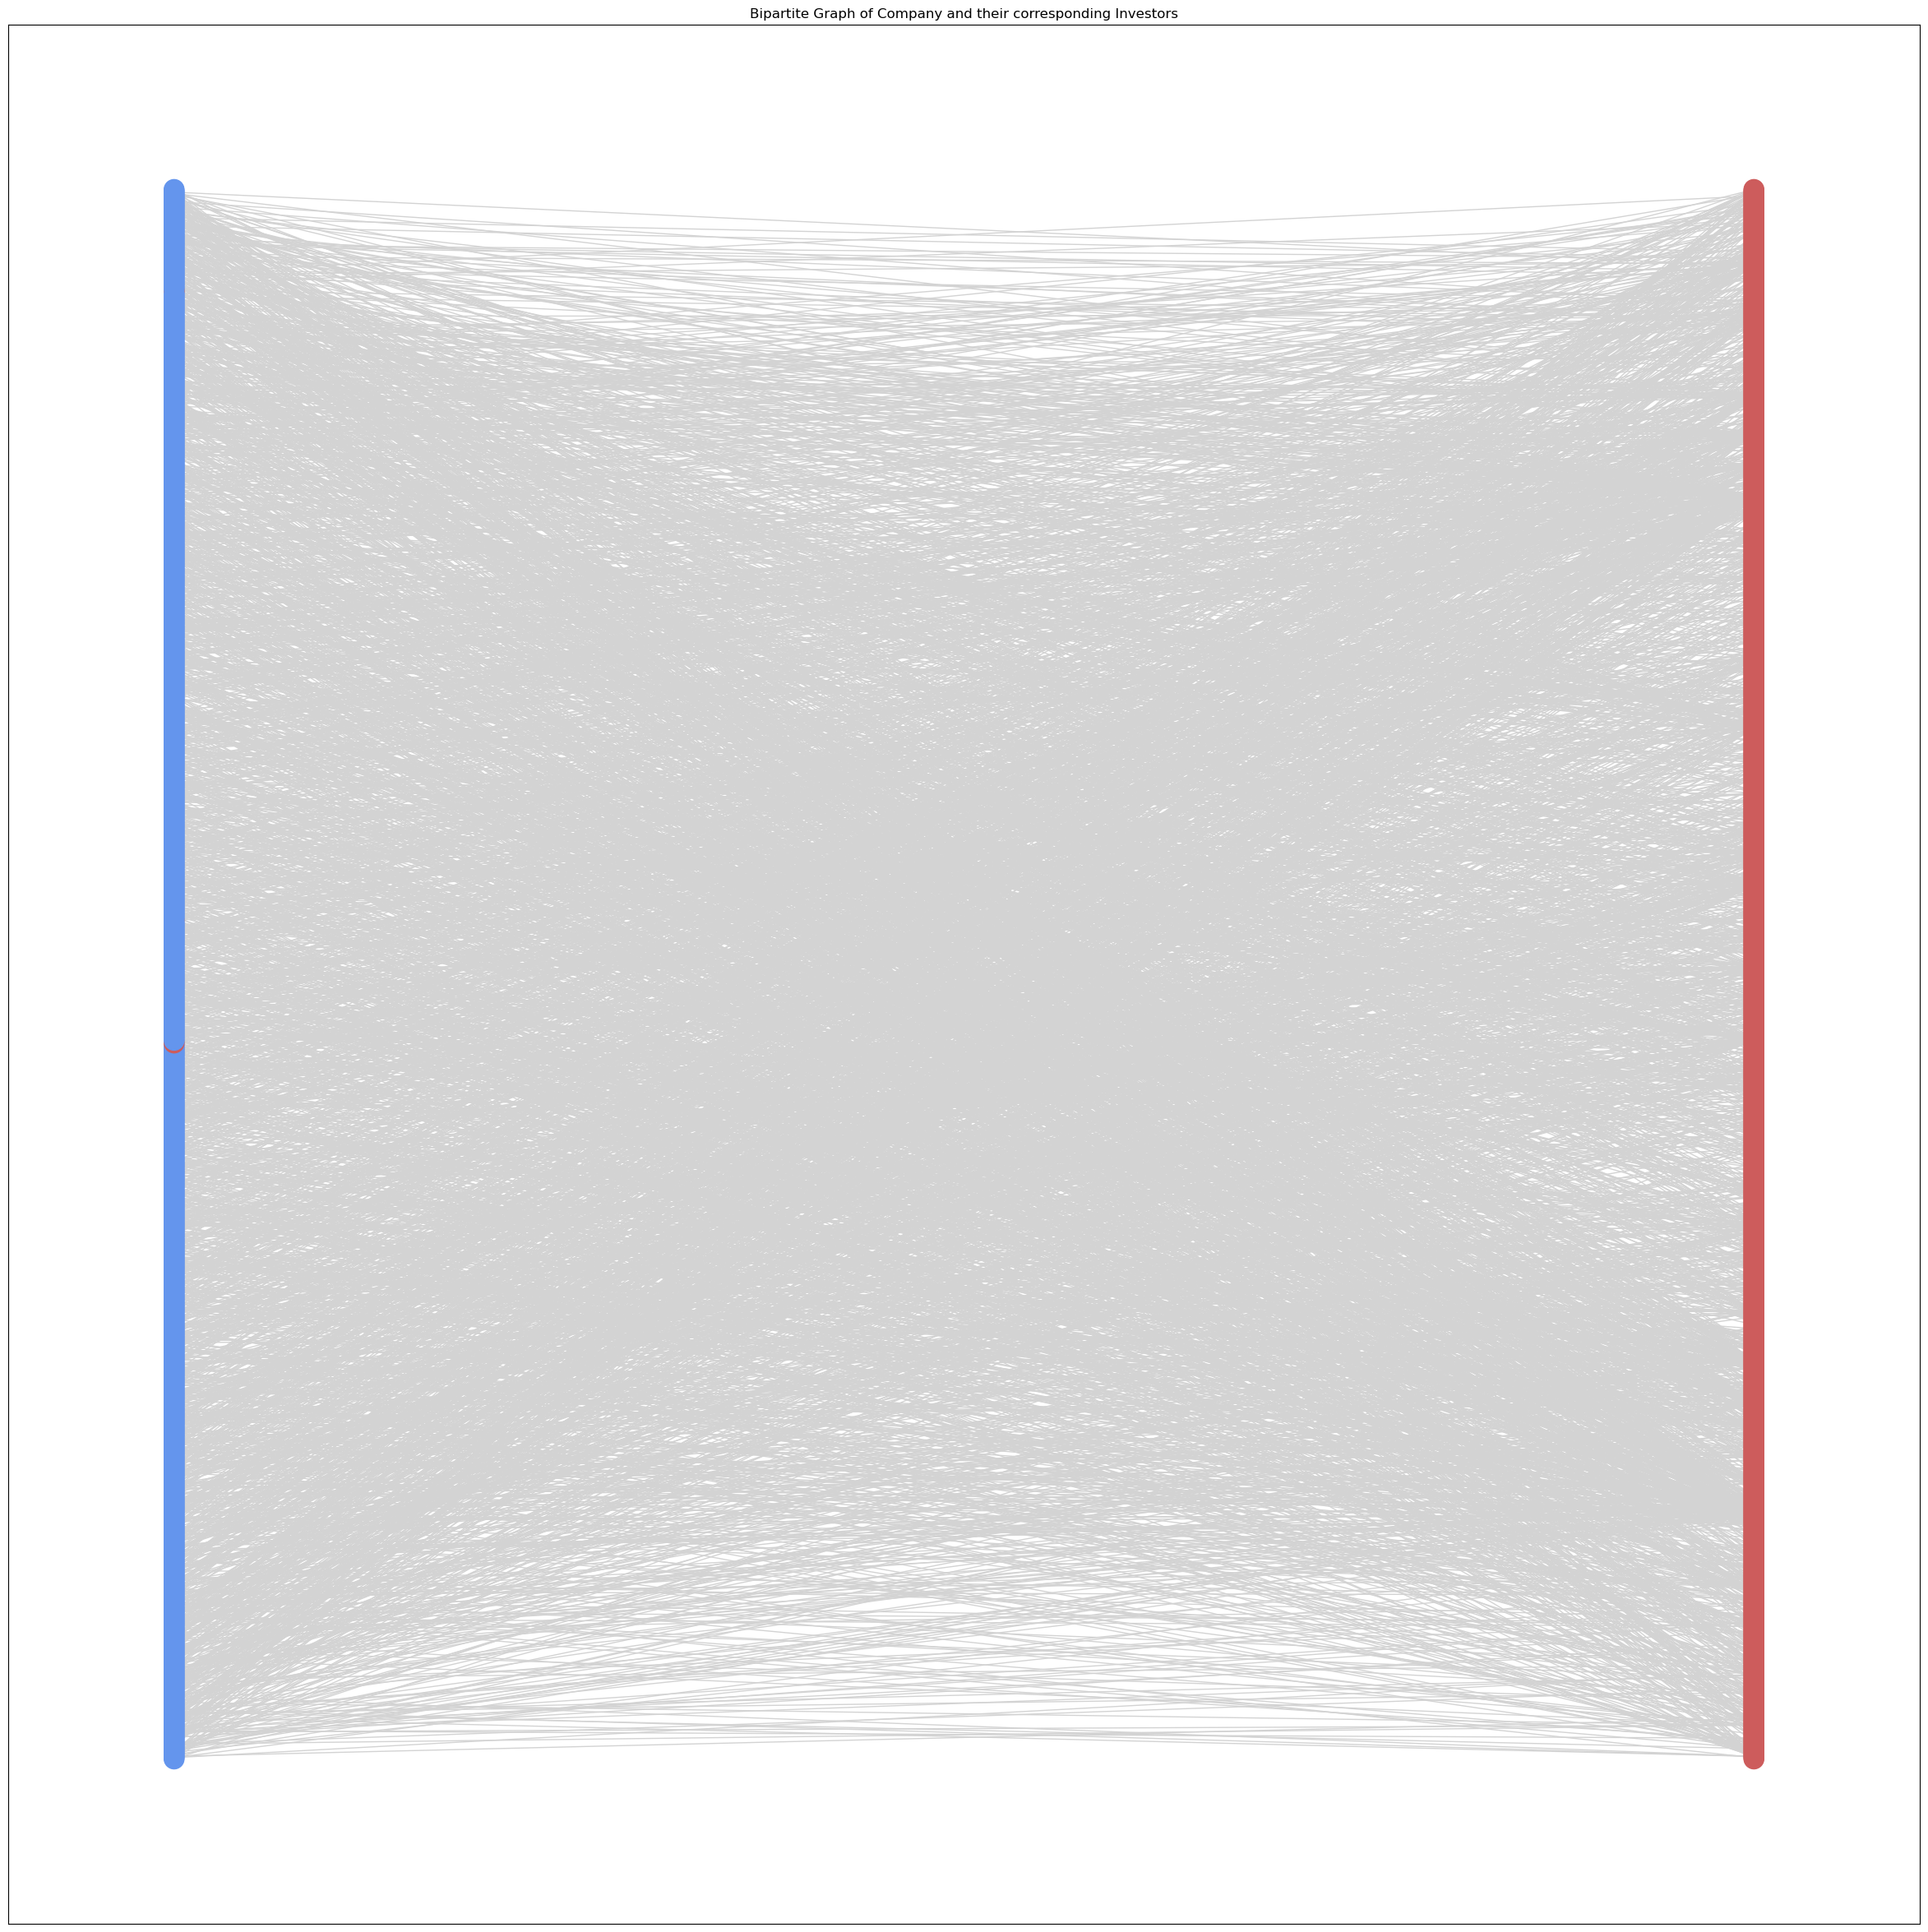

In [10]:
# Create an empty bipartite graph
B = nx.Graph()

# Add nodes from both sets to the graph
B.add_nodes_from(company_ls, bipartite=0)
B.add_nodes_from(investor_ls, bipartite=1)

# Create connections between company and investor nodes
for company, investors in data_dict.items():
    for investor in investors:
        B.add_edge(company, investor)

# Create a node color list based on the bipartite attribute
node_color = ['cornflowerblue' if B.nodes[node]['bipartite'] == 0
              else 'indianred' for node in B.nodes]

# Plot the bipartite graph
plt.figure(figsize=(30, 30))  # Set the figure size larger
pos = nx.bipartite_layout(B, company_ls)
nx.draw_networkx(B, pos=pos, with_labels=False,
                 node_color=node_color, font_size=8, edge_color='#D3D3D3')
plt.title("Bipartite Graph of Company and their corresponding Investors")
plt.show()

In [11]:
# Get the projections of the bipartite graph
company_projection = nx.bipartite.projected_graph(B, company_ls)
investor_projection = nx.bipartite.projected_graph(B, investor_ls)

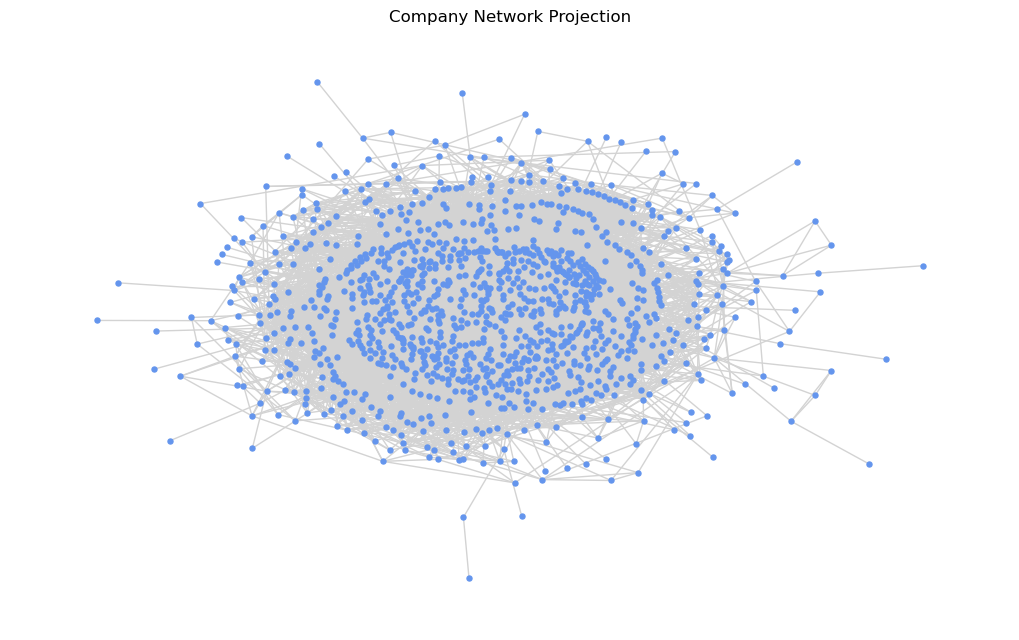

In [12]:
plt.figure(figsize=(10, 6))
pos_company = nx.kamada_kawai_layout(company_projection)
nx.draw(company_projection, pos=pos_company, with_labels=False,
        node_color='cornflowerblue', node_size=13, edge_color='#D3D3D3')
plt.title("Company Network Projection")
plt.show()

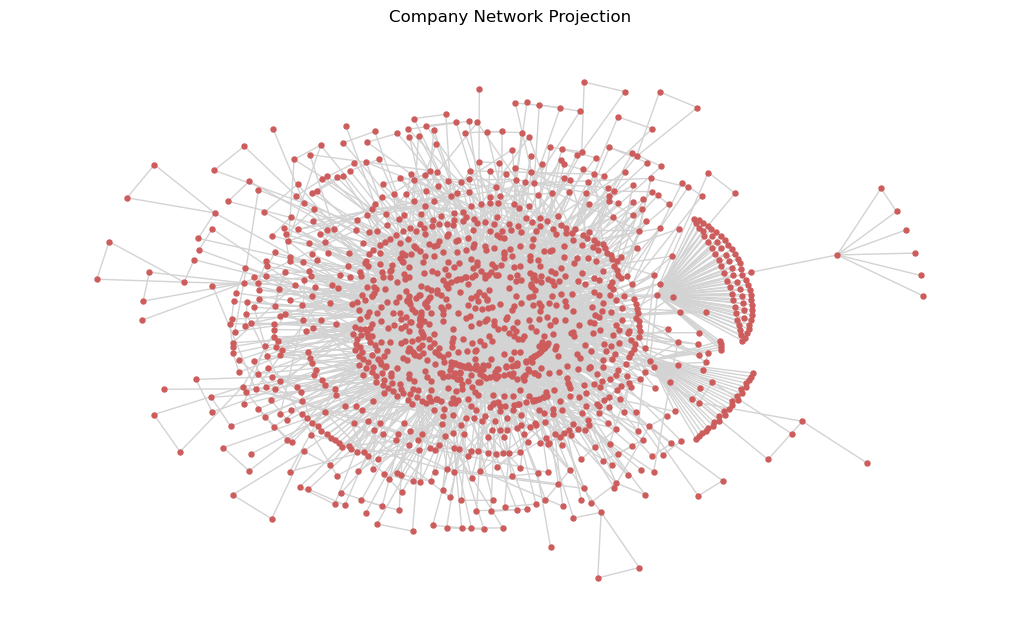

In [13]:
plt.figure(figsize=(10, 6))
pos_investor = nx.kamada_kawai_layout(investor_projection)
nx.draw(investor_projection, pos=pos_investor, with_labels=False,
        node_color='indianred', node_size=13, edge_color='#D3D3D3')
plt.title("Company Network Projection")
plt.show()

# Exploratory Data Anaysis

## Data EDA

In [14]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165 entries, 0 to 1164
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Company         1165 non-null   object        
 1   Valuation ($B)  1165 non-null   float64       
 2   Date Joined     1165 non-null   datetime64[ns]
 3   Country         1165 non-null   object        
 4   City            1165 non-null   object        
 5   Industry        1165 non-null   object        
 6   Investor1       1165 non-null   object        
 7   Investor2       1116 non-null   object        
 8   Investor3       1033 non-null   object        
 9   Investor4       11 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 91.1+ KB


In [15]:
df_final.isna().sum()

Company              0
Valuation ($B)       0
Date Joined          0
Country              0
City                 0
Industry             0
Investor1            0
Investor2           49
Investor3          132
Investor4         1154
dtype: int64

In [16]:
df_final.describe()

Valuation ($B)                    Date Joined
count     1165.000000                           1165
mean         3.250489  2020-08-05 00:13:35.793991424
min          1.000000            2007-07-02 00:00:00
25%          1.100000            2019-09-09 00:00:00
50%          1.600000            2021-05-06 00:00:00
75%          3.000000            2021-11-16 00:00:00
max        140.000000            2022-08-24 00:00:00
std          7.658645                            NaN

In [17]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165 entries, 0 to 1164
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Company         1165 non-null   object        
 1   Valuation ($B)  1165 non-null   float64       
 2   Date Joined     1165 non-null   datetime64[ns]
 3   Country         1165 non-null   object        
 4   City            1165 non-null   object        
 5   Industry        1165 non-null   object        
 6   Investor1       1165 non-null   object        
 7   Investor2       1116 non-null   object        
 8   Investor3       1033 non-null   object        
 9   Investor4       11 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 91.1+ KB


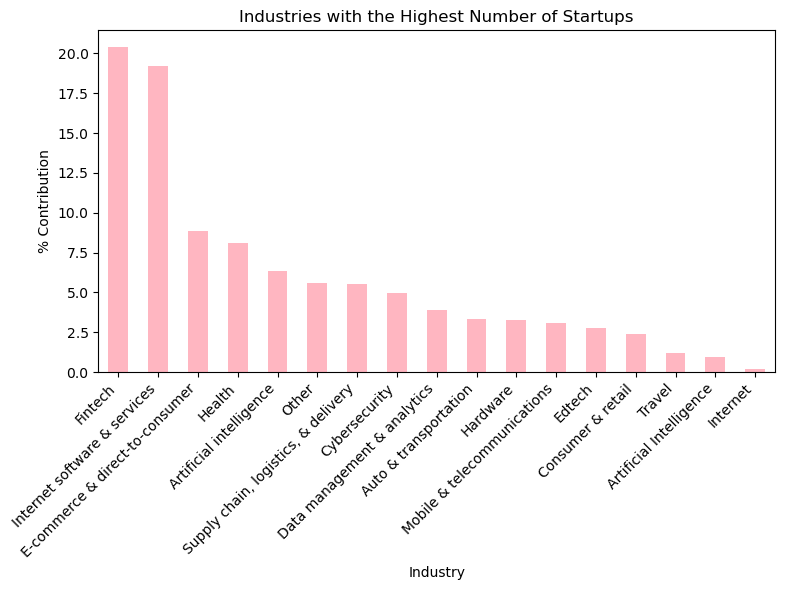

In [18]:
# Calculate % contribution of each industry
industry_counts = df_final['Industry'].value_counts()
total_startups = len(df_final)
industry_percentages = (industry_counts / total_startups) * 100

# Bar Chart: Industries with the Highest Number of Startups
plt.figure(figsize=(8, 6))
industry_percentages.plot(kind='bar', color='lightpink')
plt.xlabel('Industry')
plt.ylabel('% Contribution')
plt.title('Industries with the Highest Number of Startups')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

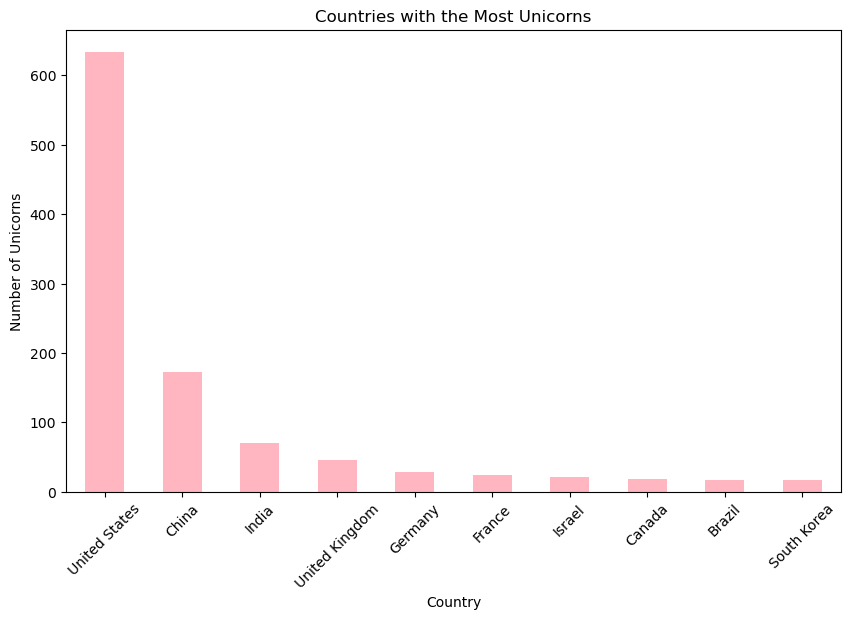

In [19]:
# Get the countries with the most unicorns
top_countries = df_final['Country'].value_counts().head(10)

# Create a bar plot for top countries
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='lightpink')
plt.title('Countries with the Most Unicorns')
plt.xlabel('Country')
plt.ylabel('Number of Unicorns')
plt.xticks(rotation=45)
plt.show()

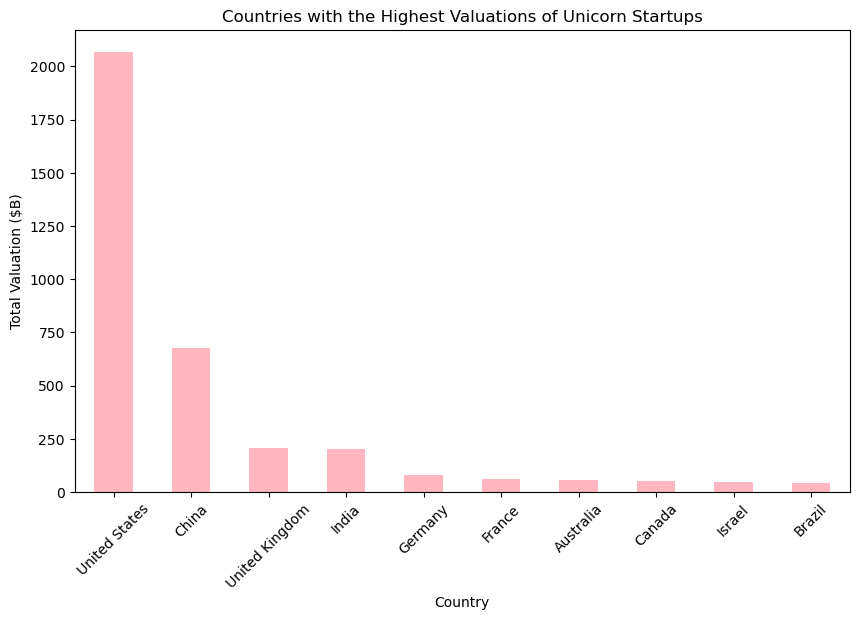

In [20]:
# Group the data by country and calculate the total valuation for each country
country_valuations = df_final.groupby(
    'Country')['Valuation ($B)'].sum().sort_values(ascending=False).head(10)

# Create a bar plot for countries with the highest valuations
plt.figure(figsize=(10, 6))
country_valuations.plot(kind='bar', color='lightpink')
plt.title('Countries with the Highest Valuations of Unicorn Startups')
plt.xlabel('Country')
plt.ylabel('Total Valuation ($B)')
plt.xticks(rotation=45)
plt.show()

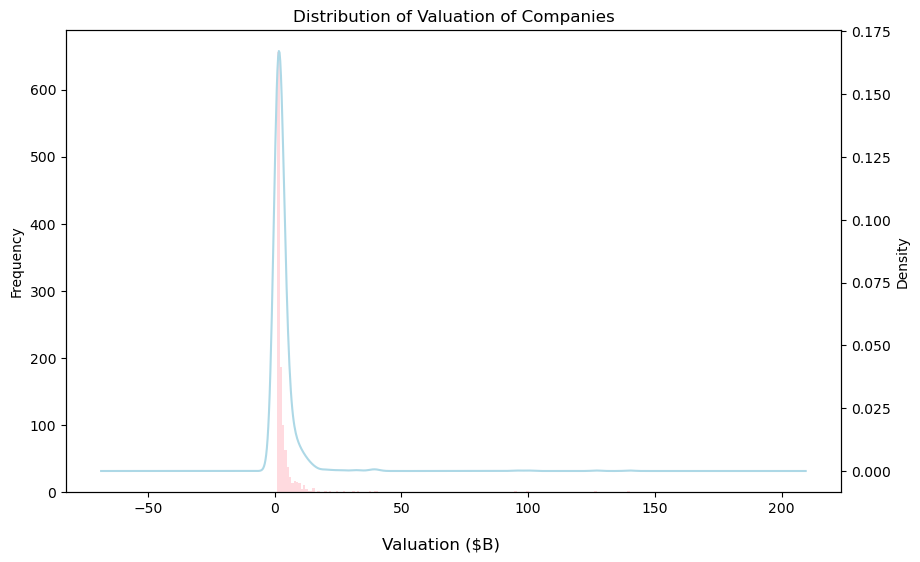

In [21]:
fig, ax = plt.subplots(1, 1, dpi=100, sharex=True, figsize=(10, 6))
df_final['Valuation ($B)'].plot.hist(alpha=0.5, color='lightpink', bins=150)
ax2 = ax.twinx()
df_final['Valuation ($B)'].plot.kde(ax=ax2, color='lightblue')
ax.grid(False)
ax2.grid(False)
plt.title('Distribution of Valuation of Companies')
fig.supxlabel('Valuation ($B)')
plt.show()

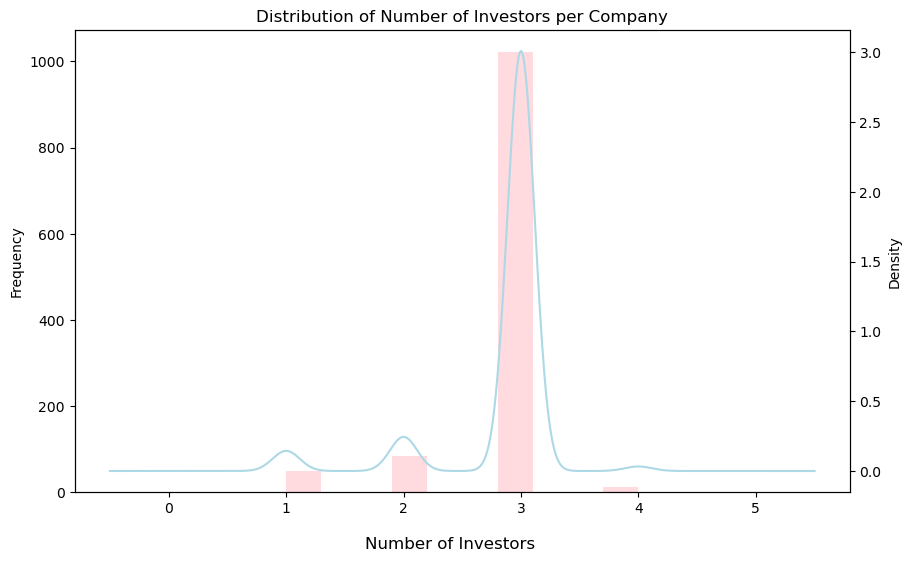

In [22]:
df_invest = df_final[['Company', 'Investor1',
                      'Investor2', 'Investor3', 'Investor4']]
df_startup = pd.melt(df_invest, id_vars='Company', value_name='investor')
df_count = df_startup.groupby(
    'Company')['investor'].count().reset_index(name='investor_count')

fig, ax = plt.subplots(1, 1, dpi=100, sharex=True, figsize=(10, 6))
df_count['investor_count'].plot.hist(alpha=0.5, color='lightpink')
ax2 = ax.twinx()
df_count['investor_count'].plot.kde(ax=ax2, color='lightblue')
ax.grid(False)
ax2.grid(False)
plt.title('Distribution of Number of Investors per Company')
fig.supxlabel('Number of Investors')
plt.show()

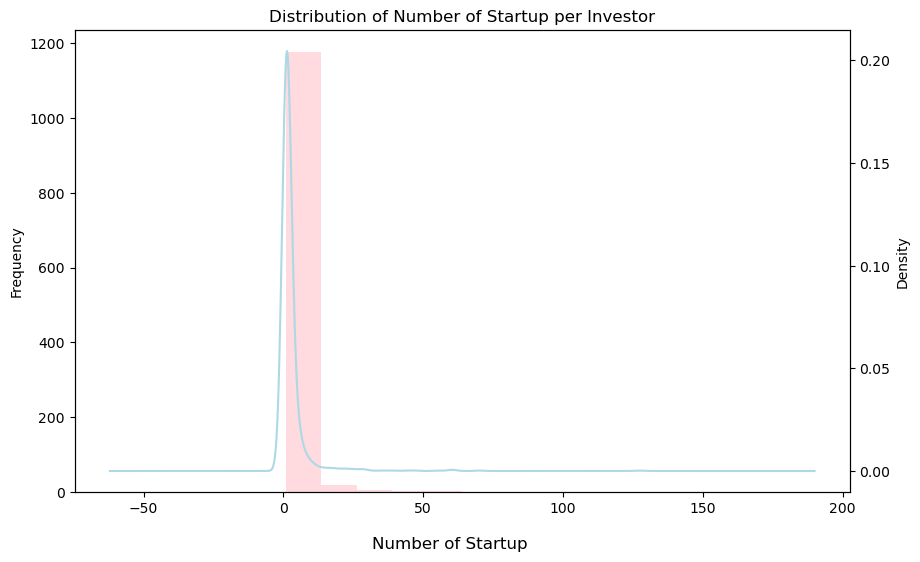

In [23]:
df_investor = df_startup.groupby(
    'investor')['Company'].count().reset_index(name='startup_count')

fig, ax = plt.subplots(1, 1, dpi=100, sharex=True, figsize=(10, 6))
df_investor['startup_count'].plot.hist(alpha=0.5, color='lightpink')
ax2 = ax.twinx()
df_investor['startup_count'].plot.kde(ax=ax2, color='lightblue')
ax.grid(False)
ax2.grid(False)
plt.title('Distribution of Number of Startup per Investor')
fig.supxlabel('Number of Startup')
plt.show()

<Figure size 1000x600 with 0 Axes>

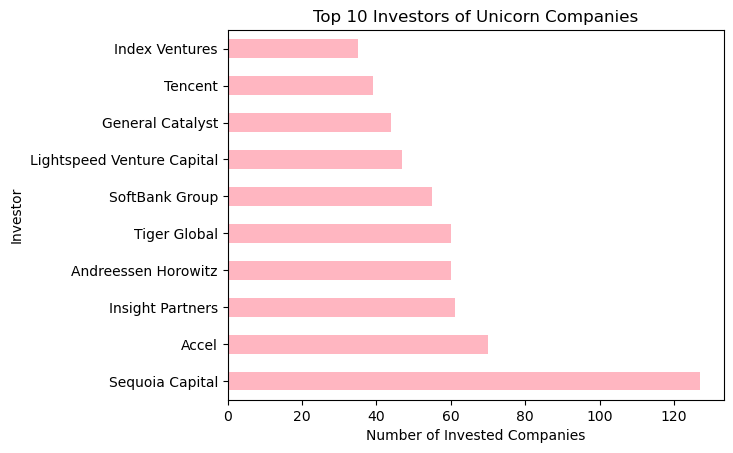

In [24]:
plt.figure(figsize=(10, 6))
df_investor.set_index('investor').sort_values(
    'startup_count', ascending=False).head(10).plot.barh(color='lightpink',
                                                         legend=None)
plt.title('Top 10 Investors of Unicorn Companies')
plt.xlabel('Number of Invested Companies')
plt.ylabel('Investor')
plt.show()

In [25]:
print(f"There are {df_final2.Investor.nunique()} unique "
      f"Investors in the dataset.")

There are 1212 unique Investors in the dataset.


In [26]:
print(f"There are {df_final2.Company.nunique()} unique "
      f"Companies in the dataset.")

There are 1165 unique Companies in the dataset.


## Network EDA

In [27]:
df = df_final2.copy()
K = nx.from_pandas_edgelist(df, 'Company', 'Investor', create_using=nx.Graph())
pos = nx.kamada_kawai_layout(K);

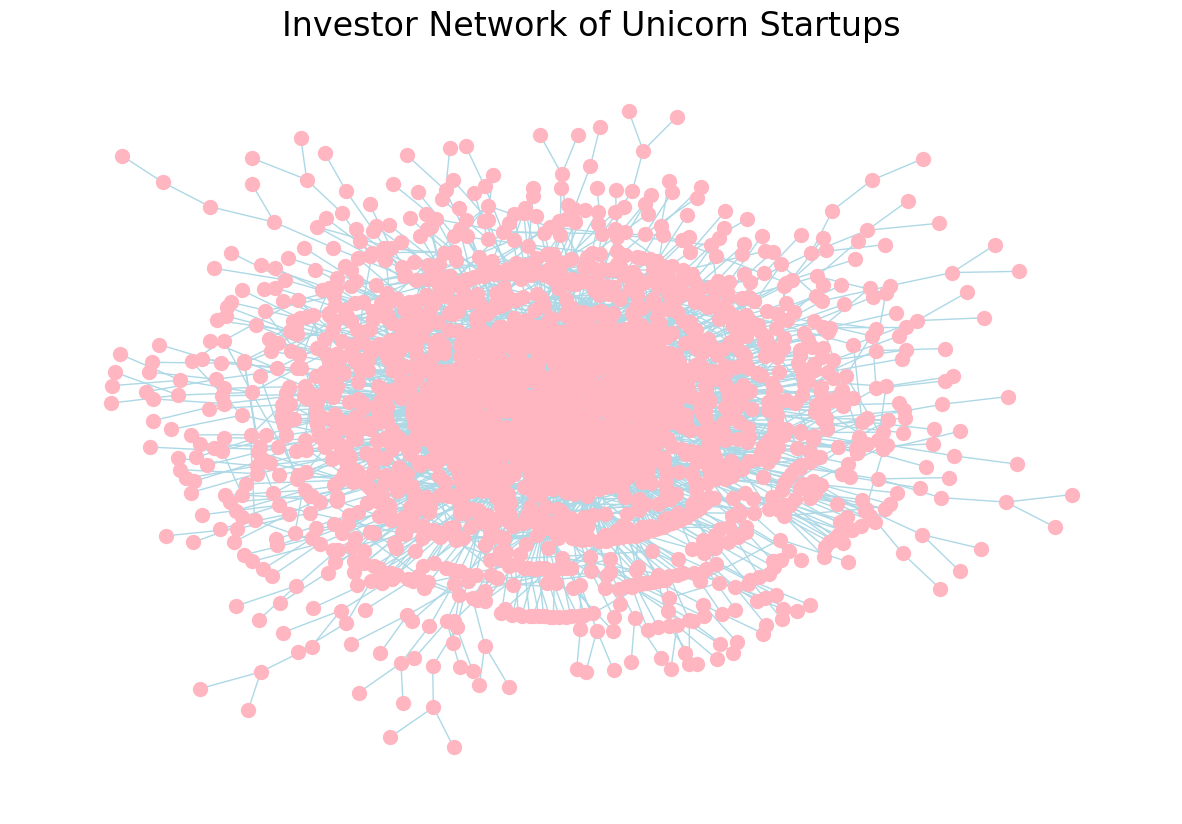

In [28]:
plt.figure(figsize=(15, 10))
plt.axis("off")
nx.draw(K, pos=pos, node_size=100,
        node_color='lightpink', edge_color='lightblue')
plt.title('Investor Network of Unicorn Startups', fontsize=24)
plt.show();

In [29]:
N = K.order()
L = K.size()

avg_deg = float(L) / N

print('Nodes: ', N)
print('Edges: ', L)
print('Average degree: ', avg_deg)

degrees = [k for node, k in nx.degree(K)]

k_min = np.min(degrees)
k_max = np.max(degrees)
k_avg = np.mean(degrees)

print('Minimum degree: ', k_min)
print('Maximum degree: ', k_max)
print('Average degree: ', k_avg)

cc = nx.clustering(K)
avg_clust = sum(cc.values()) / len(cc)
print('Average Clustering Coefficient: ', avg_clust)

Nodes:  2374
Edges:  3327
Average degree:  1.4014321819713564
Minimum degree:  1
Maximum degree:  127
Average degree:  2.802864363942713
Average Clustering Coefficient:  0.0


In [30]:
df_deg = pd.DataFrame(dict(nx.degree(K)).values(),
                      index=dict(nx.degree(K)).keys(),
                      columns=['Degree']).reset_index()
df_deg.loc[df_deg['index'].isin(df_final2.Investor.unique())].sort_values(
    'Degree', ascending=False)

index  Degree
1                       Sequoia Capital     127
51                                Accel      70
20                     Insight Partners      61
10                         Tiger Global      60
26                  Andreessen Horowitz      59
...                                 ...     ...
1131  Automobile Industry Guidance Fund       1
1133                     ATP Investment       1
1134                      kt investment       1
1136                   Fashion Tech Lab       1
2373                 Silverlink Capital       1

[1212 rows x 2 columns]

# Centrality Measures

## Degree Centrality

In [31]:
df_degree = pd.DataFrame(nx.degree_centrality(K).values(),
                         index=nx.degree_centrality(K).keys(),
                         columns=['Degree']).reset_index()
df_degree = df_degree.loc[df_degree['index'].isin(
    df_final2.Investor.unique())].sort_values('Degree', ascending=False)
display(df_degree)

index    Degree
1                       Sequoia Capital  0.053519
51                                Accel  0.029499
20                     Insight Partners  0.025706
10                         Tiger Global  0.025284
26                  Andreessen Horowitz  0.024863
...                                 ...       ...
1131  Automobile Industry Guidance Fund  0.000421
1133                     ATP Investment  0.000421
1134                      kt investment  0.000421
1136                   Fashion Tech Lab  0.000421
2373                 Silverlink Capital  0.000421

[1212 rows x 2 columns]

## Closeness Centrality

In [32]:
df_close = pd.DataFrame(nx.closeness_centrality(K,
                                                distance='FREQUENCY').values(),
                        index=nx.closeness_centrality(K).keys(),
                        columns=['Closeness']).reset_index()
df_close = df_close.loc[df_close['index'].isin(
    df_final2.Investor.unique())].sort_values('Closeness', ascending=False)
display(df_close)

index  Closeness
1                      Sequoia Capital   0.229260
10                        Tiger Global   0.212850
51                               Accel   0.210353
43          Lightspeed Venture Capital   0.208728
26                 Andreessen Horowitz   0.207794
...                                ...        ...
2301  Railway Pension Trustee Co. Ltd.   0.000421
2303              GCP Capital Partners   0.000421
1429           Taigang Venture Capital   0.000421
1077                L Capital Partners   0.000421
665               CPP Investment Board   0.000421

[1212 rows x 2 columns]

## Betweenness Centrality

In [33]:
df_betn = pd.DataFrame(
    nx.betweenness_centrality(K, weight='FREQUENCY').values(),
    index=nx.betweenness_centrality(K).keys(),
    columns=['Betweenness']).reset_index()
df_betn = df_betn.loc[df_betn['index'].isin(
    df_final2.Investor.unique())].sort_values('Betweenness', ascending=False)
display(df_betn)

index  Betweenness
1                       Sequoia Capital     0.216461
51                                Accel     0.101166
10                         Tiger Global     0.082956
20                     Insight Partners     0.079189
26                  Andreessen Horowitz     0.073498
...                                 ...          ...
1131  Automobile Industry Guidance Fund     0.000000
1133                     ATP Investment     0.000000
1134                      kt investment     0.000000
1136                   Fashion Tech Lab     0.000000
2373                 Silverlink Capital     0.000000

[1212 rows x 2 columns]

## Eigenvector Centrality

In [34]:
df_eigen = pd.DataFrame(nx.eigenvector_centrality(K, weight='FREQUENCY',
                                                  max_iter=1000).values(),
                        index=nx.eigenvector_centrality(K).keys(),
                        columns=['Eigenvector']).reset_index()
df_eigen = df_eigen.loc[df_eigen['index'].isin(
    df_final2.Investor.unique())].sort_values('Eigenvector', ascending=False)
display(df_eigen)

index   Eigenvector
1                       Sequoia Capital  6.613002e-01
10                         Tiger Global  9.622243e-02
51                                Accel  9.094185e-02
33                              Tencent  8.928759e-02
20                     Insight Partners  6.768492e-02
...                                 ...           ...
2252           China Prosperity Capital  1.948083e-44
2063                     Ginko Ventures  1.948083e-44
1131  Automobile Industry Guidance Fund  1.948083e-44
2161                      Hinduja Group  1.948083e-44
1429            Taigang Venture Capital  1.948083e-44

[1212 rows x 2 columns]

/opt/conda/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


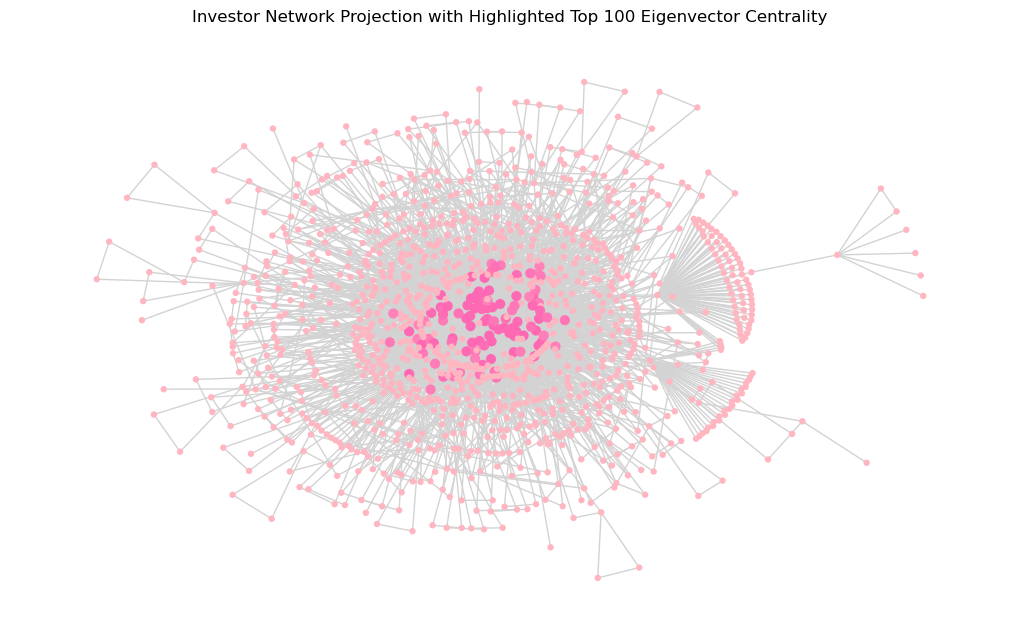

In [35]:
eigenvector_centrality = nx.eigenvector_centrality(investor_projection)

# Sort nodes by eigenvector centrality and get the top 200 nodes
sorted_nodes = sorted(eigenvector_centrality.keys(
), key=lambda x: eigenvector_centrality[x], reverse=True)[:100]

# # Create a colormap for all nodes based on centrality values
# cmap = plt.get_cmap("RdPu")

# Create a custom "lightpink" colormap
cmap = mcolors.LinearSegmentedColormap.from_list(
    "lightpink", ['#FFB6C1', '#FF69B4'])

# Create a list of colors for all nodes, highlighting the top 200 nodes
node_colors = [
    cmap(eigenvector_centrality[node] * 20) if node in sorted_nodes else cmap(
    eigenvector_centrality[node]) for node in investor_projection.nodes()]

# Define the edge color (gray)
edge_color = '#D3D3D3'

# Define node sizes, making the top 200 nodes larger
node_sizes = [
    40 if node in sorted_nodes else 13 for node in investor_projection.nodes()]

# Plot the investor projection
plt.figure(figsize=(10, 6))
pos_investor = nx.kamada_kawai_layout(investor_projection)
nx.draw(investor_projection, pos=pos_investor, with_labels=False,
        node_color=node_colors, node_size=node_sizes,
        edge_color=edge_color, cmap=cmap)
plt.title("Investor Network Projection with "
          "Highlighted Top 100 Eigenvector Centrality")
plt.show()

# SI Simulation

## Simulation Vanilla

In [36]:
def initial_investors(graph, ls_source=None, ls_len=10, industry_startup=None):
    # Random Sampling of initial informed
    if ls_source is None:
        initial_ls = random.sample(list(graph.nodes()), 1200)
        if industry_startup is not None:
            same_industry_investor = [
                investor for investor, industry in dict_investor_industry.items(
                ) if industry_startup in industry]
            initial_ls = [
                investor for investor in initial_ls
                if investor in same_industry_investor]

        return initial_ls[:ls_len]

    # Initial informed from the identified top centrality measure
    else:
        if industry_startup is not None:
            same_industry_investor = [
                investor for investor, industry in dict_investor_industry.items(
                ) if industry_startup in industry]
            ls_source = [
                investor for investor in ls_source
                if investor in same_industry_investor]

        return ls_source[:ls_len]


def initialize_states(graph, initial_ls):
    # Initialize the dataframe to track node status
    df_state = pd.DataFrame({'Investors': list(graph.nodes()),
                             'State': [0]*graph.number_of_nodes()})

    # Change the status of initially informed investors
    for informed_node in initial_ls:
        df_state.loc[df_state['Investors'] == informed_node, 'State'] = 1

    return df_state


def si_simulation(graph, df_state, beta, num_steps, top100_eigen):
    # Initialize output containers
    sus_count = []
    inf_count = []
    eig_count = []

    # At t=0, save metrics
    sus_count.append(df_state['State'].value_counts(1)[0])
    inf_count.append(df_state['State'].value_counts(1)[1])
    informed_node = set(
        df_state.loc[df_state['State'] == 1, 'Investors'].tolist())
    eig_count.append(len(top100_eigen.intersection(informed_node))/100)

    # Simulation loop
    for _ in trange(num_steps):
        for i in range(df_state.shape[0]):
            if df_state.loc[i, 'State'] == 1:
                informed_node = df_state.loc[i, 'Investors']
                for neighbor_node in graph.neighbors(informed_node):
                    if df_state.loc[df_state['Investors'] == neighbor_node, 'State'].values[0] == 0 and random.random() < beta:
                        df_state.loc[df_state['Investors']
                                     == neighbor_node, 'State'] = 1

        # Quantity Metric (How many nodes are informed?)
        sus_count.append(df_state['State'].value_counts(1)[0])
        inf_count.append(df_state['State'].value_counts(1)[1])

        # Quality Metric (How many of those informed are part of top 100 eigenvector centrality?)
        informed_node = set(
            df_state.loc[df_state['State'] == 1, 'Investors'].tolist())
        eig_count.append(len(top100_eigen.intersection(informed_node))/100)

    return sus_count, inf_count, eig_count


def plot_si_simulation(total_count, sus_count, inf_count, eig_count):
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    ax.plot(range(len(sus_count)), sus_count, label="% Susceptible Investors")
    ax.plot(range(len(inf_count)), inf_count, label="% Informed Investors")
    ax.plot(range(len(eig_count)), eig_count,
            label="% Informed Top Eigenvector Investors")
    ax.set_xlabel("Time Step")
    ax.set_ylabel("Proportion of Nodes")
    ax.set_title("Susceptible-Informed (SI) Simulation")
    ax.legend(loc='lower right')
    plt.show()

In [37]:
# Initialize variables
num_steps = 20
beta = 0.1
num_initial_investors = 10

# Qualitative Metric Comparison
top100_eigen = set(df_eigen['index'][:100].tolist())

# Final Dataframe of output
df_res = pd.DataFrame()

# Define list sorted according to the valuation of company
ls_valuation = df_final2.sort_values(by='Valuation ($B)', ascending=False)[
    'Investor'].unique().tolist()

### Scenario 0: Random 10 Investors

100%|██████████| 20/20 [00:28<00:00,  1.41s/it]


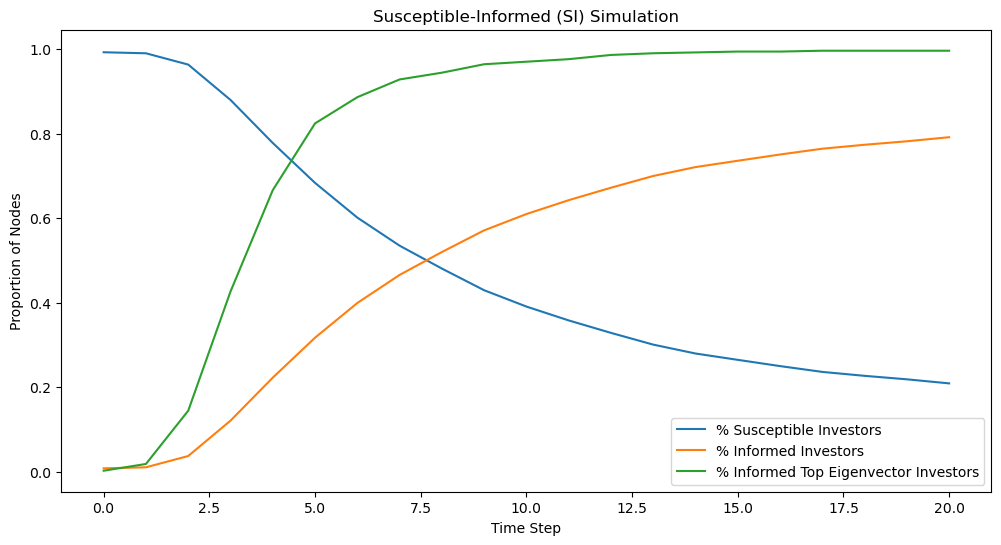

In [38]:
# Multiple runs to get the average simulation results
df_sus_random = pd.DataFrame()
df_inf_random = pd.DataFrame()
df_eig_random = pd.DataFrame()
for i in range(1, 6):
    # Setup initial informed investors
    initial_random = initial_investors(
        investor_projection, ls_len=num_initial_investors)
    df_state_random = initialize_states(investor_projection, initial_random)

    # Simulate
    sus_random, inf_random, eig_random = si_simulation(
        investor_projection, df_state_random, beta, num_steps, top100_eigen)
    df_sus_random[f'Trial {i}'] = sus_random
    df_inf_random[f'Trial {i}'] = inf_random
    df_eig_random[f'Trial {i}'] = eig_random

# Calculate average and save to results
df_res['Sus_Random'] = df_sus_random.mean(axis=1)
df_res['Inf_Random'] = df_inf_random.mean(axis=1)
df_res['Eig_Random'] = df_eig_random.mean(axis=1)

# Plot
plot_si_simulation(df_res.shape[0], df_res['Sus_Random'],
                   df_res['Inf_Random'], df_res['Eig_Random'])

### Scenario 1: Investors of Top Valued Startups

100%|██████████| 20/20 [00:31<00:00,  1.59s/it]


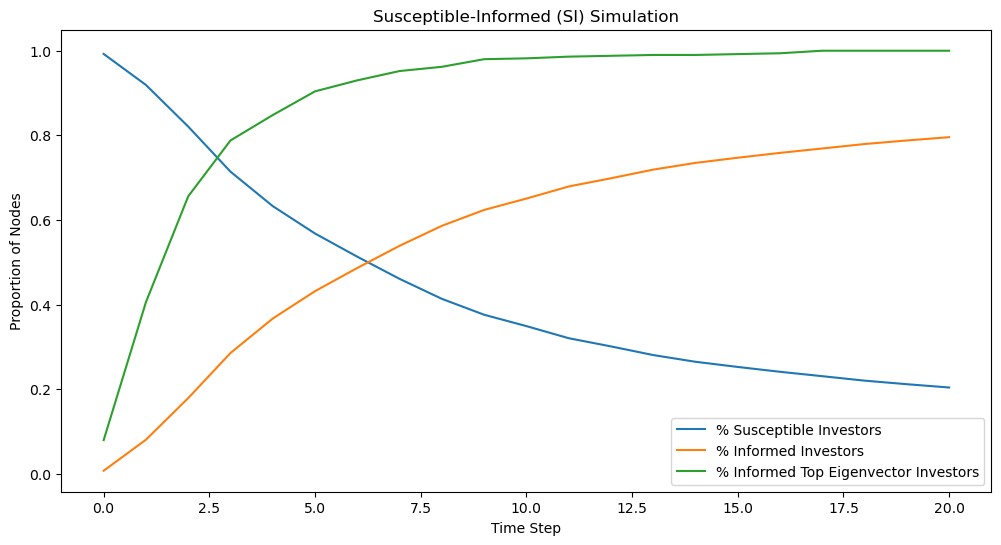

In [39]:
# Multiple runs to get the average simulation results
df_sus_val = pd.DataFrame()
df_inf_val = pd.DataFrame()
df_eig_val = pd.DataFrame()
for i in range(1, 6):
    # Setup initial informed investors
    initial_val = initial_investors(
        investor_projection, ls_source=ls_valuation,
        ls_len=num_initial_investors)
    df_state_val = initialize_states(investor_projection, initial_val)

    # Simulate
    sus_val, inf_val, eig_val = si_simulation(
        investor_projection, df_state_val, beta, num_steps, top100_eigen)
    df_sus_val[f'Trial {i}'] = sus_val
    df_inf_val[f'Trial {i}'] = inf_val
    df_eig_val[f'Trial {i}'] = eig_val

# Calculate average and save to results
df_res['Sus_Val'] = df_sus_val.mean(axis=1)
df_res['Inf_Val'] = df_inf_val.mean(axis=1)
df_res['Eig_Val'] = df_eig_val.mean(axis=1)

# Plot
plot_si_simulation(df_res.shape[0], df_res['Sus_Val'],
                   df_res['Inf_Val'], df_res['Eig_Val'])

### Scenario 2: Top 10 Degree Centrality

100%|██████████| 20/20 [00:33<00:00,  1.65s/it]


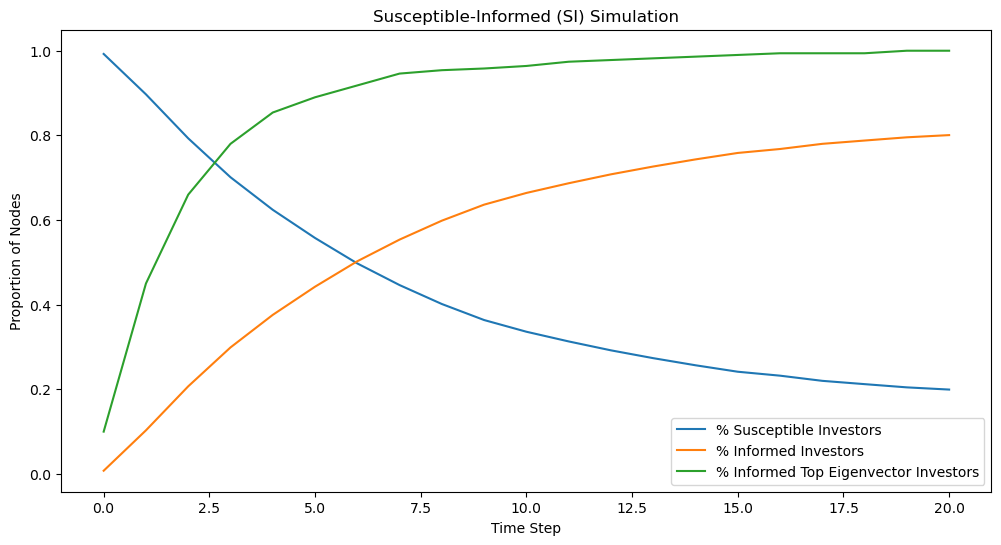

In [40]:
# Multiple runs to get the average simulation results
df_sus_degree = pd.DataFrame()
df_inf_degree = pd.DataFrame()
df_eig_degree = pd.DataFrame()
for i in range(1, 6):
    # Setup initial informed investors
    initial_degree = initial_investors(
        investor_projection, ls_source=df_degree['index'].tolist(),
        ls_len=num_initial_investors)
    df_state_degree = initialize_states(investor_projection, initial_degree)

    # Simulate
    sus_degree, inf_degree, eig_degree = si_simulation(
        investor_projection, df_state_degree, beta, num_steps, top100_eigen)
    df_sus_degree[f'Trial {i}'] = sus_degree
    df_inf_degree[f'Trial {i}'] = inf_degree
    df_eig_degree[f'Trial {i}'] = eig_degree

# Calculate average and save to results
df_res['Sus_Degree'] = df_sus_degree.mean(axis=1)
df_res['Inf_Degree'] = df_inf_degree.mean(axis=1)
df_res['Eig_Degree'] = df_eig_degree.mean(axis=1)

# Plot
plot_si_simulation(df_res.shape[0], df_res['Sus_Degree'],
                   df_res['Inf_Degree'], df_res['Eig_Degree'])

### Scenario 3: Top 10 Closeness Centrality

100%|██████████| 20/20 [00:31<00:00,  1.60s/it]


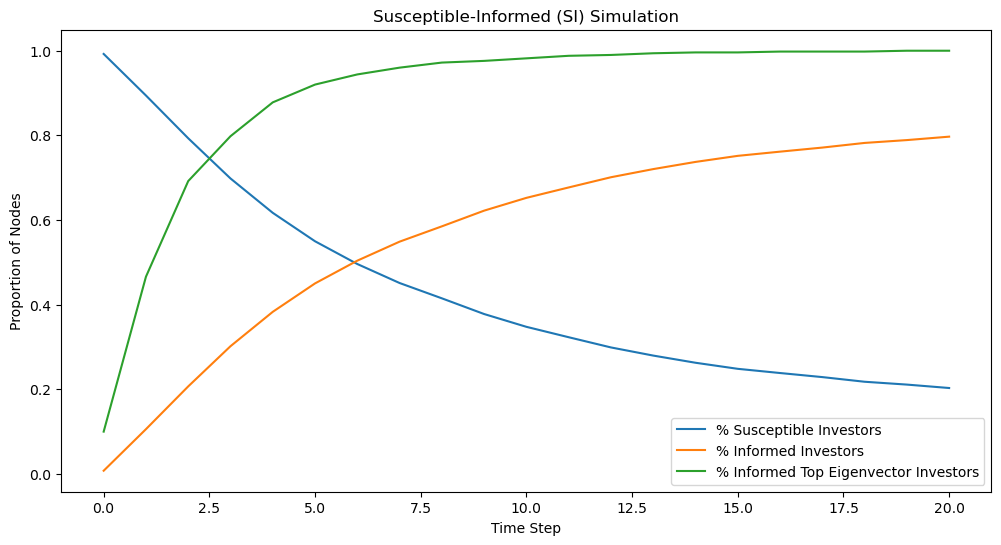

In [41]:
# Multiple runs to get the average simulation results
df_sus_close = pd.DataFrame()
df_inf_close = pd.DataFrame()
df_eig_close = pd.DataFrame()
for i in range(1, 6):
    # Setup initial informed investors
    initial_close = initial_investors(
        investor_projection, ls_source=df_close['index'].tolist(),
        ls_len=num_initial_investors)
    df_state_close = initialize_states(investor_projection, initial_close)

    # Simulate
    sus_close, inf_close, eig_close = si_simulation(
        investor_projection, df_state_close, beta, num_steps, top100_eigen)
    df_sus_close[f'Trial {i}'] = sus_close
    df_inf_close[f'Trial {i}'] = inf_close
    df_eig_close[f'Trial {i}'] = eig_close

# Calculate average and save to results
df_res['Sus_Close'] = df_sus_close.mean(axis=1)
df_res['Inf_Close'] = df_inf_close.mean(axis=1)
df_res['Eig_Close'] = df_eig_close.mean(axis=1)

# Plot
plot_si_simulation(df_res.shape[0], df_res['Sus_Close'],
                   df_res['Inf_Close'], df_res['Eig_Close'])

### Scenario 4: Top 10 Betweenness Centrality

100%|██████████| 20/20 [00:32<00:00,  1.64s/it]


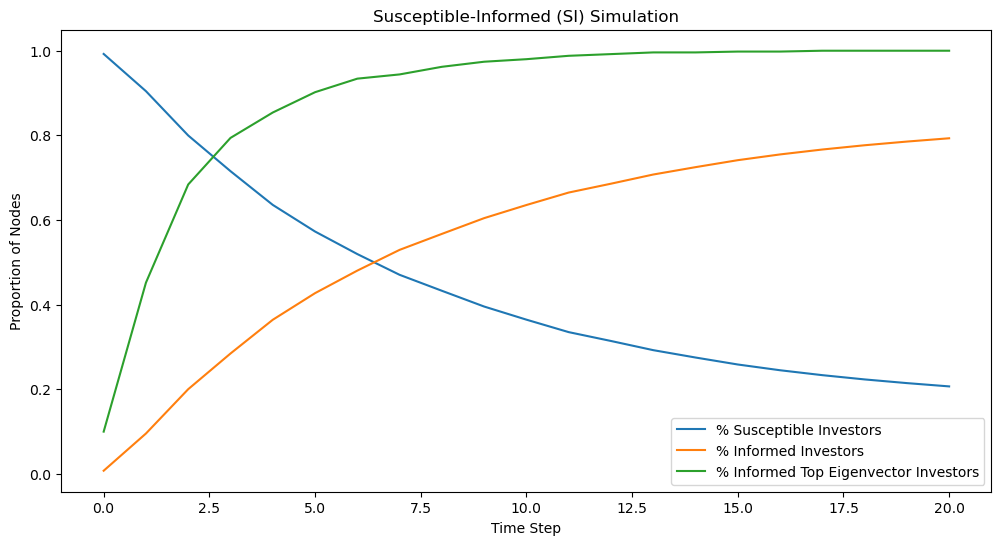

In [42]:
# Multiple runs to get the average simulation results
df_sus_betn = pd.DataFrame()
df_inf_betn = pd.DataFrame()
df_eig_betn = pd.DataFrame()
for i in range(1, 6):
    # Setup initial informed investors
    initial_betn = initial_investors(
        investor_projection, ls_source=df_betn['index'].tolist(),
        ls_len=num_initial_investors)
    df_state_betn = initialize_states(investor_projection, initial_betn)

    # Simulate
    sus_betn, inf_betn, eig_betn = si_simulation(
        investor_projection, df_state_betn, beta, num_steps, top100_eigen)
    df_sus_betn[f'Trial {i}'] = sus_betn
    df_inf_betn[f'Trial {i}'] = inf_betn
    df_eig_betn[f'Trial {i}'] = eig_betn

# Calculate average and save to results
df_res['Sus_Betn'] = df_sus_betn.mean(axis=1)
df_res['Inf_Betn'] = df_inf_betn.mean(axis=1)
df_res['Eig_Betn'] = df_eig_betn.mean(axis=1)

# Plot
plot_si_simulation(df_res.shape[0], df_res['Sus_Betn'],
                   df_res['Inf_Betn'], df_res['Eig_Betn'])

### Scenario 5: Top 10 Eigenvector Centrality

100%|██████████| 20/20 [00:33<00:00,  1.65s/it]


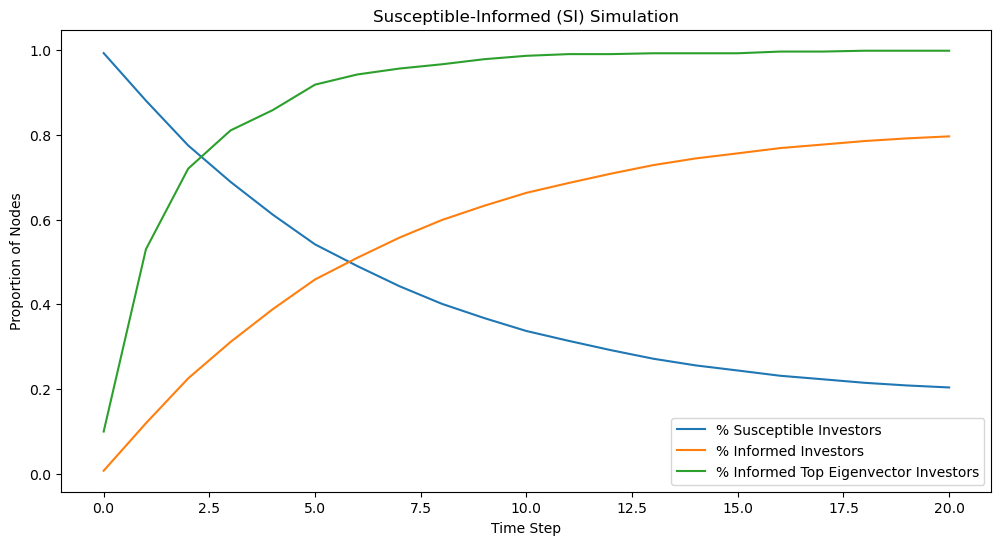

In [43]:
# Multiple runs to get the average simulation results
df_sus_eigen = pd.DataFrame()
df_inf_eigen = pd.DataFrame()
df_eig_eigen = pd.DataFrame()
for i in range(1, 6):
    # Setup initial informed investors
    initial_eigen = initial_investors(
        investor_projection, ls_source=df_eigen['index'].tolist(),
        ls_len=num_initial_investors)
    df_state_eigen = initialize_states(investor_projection, initial_eigen)

    # Simulate
    sus_eigen, inf_eigen, eig_eigen = si_simulation(
        investor_projection, df_state_eigen, beta, num_steps, top100_eigen)
    df_sus_eigen[f'Trial {i}'] = sus_eigen
    df_inf_eigen[f'Trial {i}'] = inf_eigen
    df_eig_eigen[f'Trial {i}'] = eig_eigen

# Calculate average and save to results
df_res['Sus_Eigen'] = df_sus_eigen.mean(axis=1)
df_res['Inf_Eigen'] = df_inf_eigen.mean(axis=1)
df_res['Eig_Eigen'] = df_eig_eigen.mean(axis=1)

# Plot
plot_si_simulation(df_res.shape[0], df_res['Sus_Eigen'],
                   df_res['Inf_Eigen'], df_res['Eig_Eigen'])

### Scenario Comparisons

In [44]:
df_res = df_res[['Sus_Val', 'Sus_Random', 'Sus_Degree', 'Sus_Close', 'Sus_Betn', 'Sus_Eigen',
                 'Inf_Val', 'Inf_Random', 'Inf_Degree', 'Inf_Close', 'Inf_Betn', 'Inf_Eigen',
                 'Eig_Val', 'Eig_Random', 'Eig_Degree', 'Eig_Close', 'Eig_Betn', 'Eig_Eigen']]
display(df_res)

Sus_Val  Sus_Random  Sus_Degree  Sus_Close  Sus_Betn  Sus_Eigen  \
0   0.992366    0.992366    0.992366   0.992366  0.992366   0.992366   
1   0.919084    0.989924    0.896947   0.894198  0.904427   0.880305   
2   0.820763    0.963206    0.792977   0.793130  0.799695   0.774504   
3   0.714198    0.879542    0.701069   0.698168  0.715420   0.688855   
4   0.632824    0.777710    0.624122   0.616947  0.635725   0.611450   
5   0.568092    0.683206    0.557557   0.549771  0.572824   0.541374   
6   0.513282    0.601069    0.497405   0.496031  0.519542   0.490229   
7   0.460916    0.534656    0.446260   0.451145  0.470534   0.442595   
8   0.413740    0.480458    0.401527   0.414962  0.432824   0.401221   
9   0.376183    0.429160    0.363664   0.377863  0.395573   0.367634   
10  0.349313    0.390534    0.336031   0.347634  0.364580   0.337099   
11  0.320763    0.357710    0.313130   0.323053  0.335115   0.313893   
12  0.301374    0.328244    0.292061   0.298931  0.314198   0.291908   
13  0.280916    0.300458    0.273588   0.279695  0.292519   0.271756   
14  0.265038    0.279389    0.256794   0.262748  0.275115   0.256031   
15  0.252824    0.264427    0.241527   0.248397  0.258626   0.243969   
16  0.241374    0.249618    0.232214   0.238473  0.245038   0.231603   
17  0.230992    0.235878    0.220000   0.228855  0.233435   0.223359   
18  0.220458    0.226565    0.212214   0.217863  0.223359   0.214962   
19  0.212061    0.218321    0.204580   0.211145  0.214656   0.208702   
20  0.204275    0.208702    0.199389   0.203053  0.206870   0.203969   

     Inf_Val  Inf_Random  Inf_Degree  Inf_Close  Inf_Betn  Inf_Eigen  Eig_Val  \
0   0.007634    0.007634    0.007634   0.007634  0.007634   0.007634    0.080   
1   0.080916    0.010076    0.103053   0.105802  0.095573   0.119695    0.406   
2   0.179237    0.036794    0.207023   0.206870  0.200305   0.225496    0.656   
3   0.285802    0.120458    0.298931   0.301832  0.284580   0.311145    0.788   
4   0.367176    0.222290    0.375878   0.383053  0.364275   0.388550    0.848   
5   0.431908    0.316794    0.442443   0.450229  0.427176   0.458626    0.904   
6   0.486718    0.398931    0.502595   0.503969  0.480458   0.509771    0.930   
7   0.539084    0.465344    0.553740   0.548855  0.529466   0.557405    0.952   
8   0.586260    0.519542    0.598473   0.585038  0.567176   0.598779    0.962   
9   0.623817    0.570840    0.636336   0.622137  0.604427   0.632366    0.980   
10  0.650687    0.609466    0.663969   0.652366  0.635420   0.662901    0.982   
11  0.679237    0.642290    0.686870   0.676947  0.664885   0.686107    0.986   
12  0.698626    0.671756    0.707939   0.701069  0.685802   0.708092    0.988   
13  0.719084    0.699542    0.726412   0.720305  0.707481   0.728244    0.990   
14  0.734962    0.720611    0.743206   0.737252  0.724885   0.743969    0.990   
15  0.747176    0.735573    0.758473   0.751603  0.741374   0.756031    0.992   
16  0.758626    0.750382    0.767786   0.761527  0.754962   0.768397    0.994   
17  0.769008    0.764122    0.780000   0.771145  0.766565   0.776641    1.000   
18  0.779542    0.773435    0.787786   0.782137  0.776641   0.785038    1.000   
19  0.787939    0.781679    0.795420   0.788855  0.785344   0.791298    1.000   
20  0.795725    0.791298    0.800611   0.796947  0.793130   0.796031    1.000   

    Eig_Random  Eig_Degree  Eig_Close  Eig_Betn  Eig_Eigen  
0        0.002       0.100      0.100     0.100      0.100  
1        0.018       0.450      0.466     0.452      0.530  
2        0.144       0.660      0.692     0.684      0.720  
3        0.426       0.780      0.798     0.794      0.810  
4        0.666       0.854      0.878     0.854      0.858  
5        0.824       0.890      0.920     0.902      0.918  
6        0.886       0.918      0.944     0.934      0.942  
7        0.928       0.946      0.960     0.944      0.956  
8        0.944       0.954      0.972     0.962      0.966  
9        0.964       0.958 

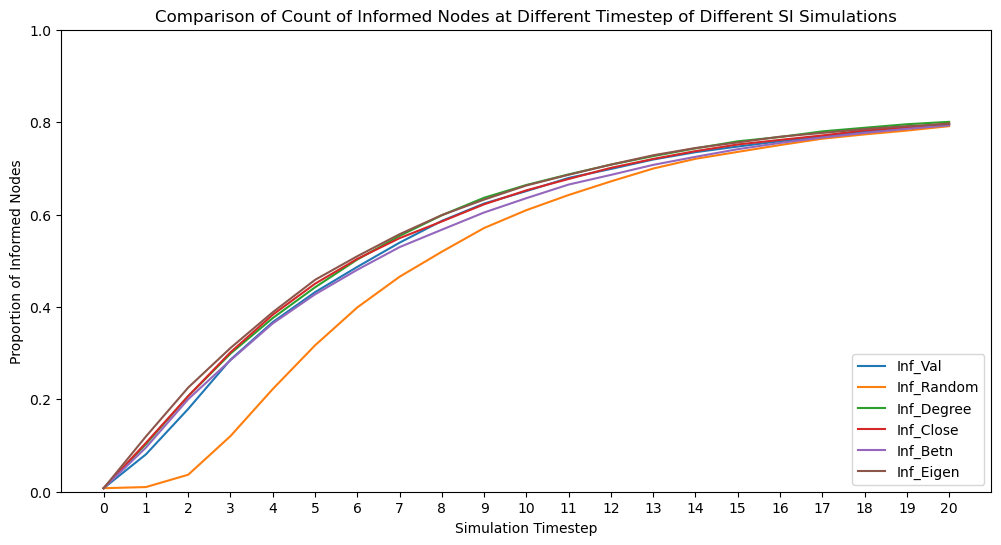

In [45]:
# Plot of Qualitative Metric
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
df_res[['Inf_Val', 'Inf_Random', 'Inf_Degree',
        'Inf_Close', 'Inf_Betn', 'Inf_Eigen']].plot(ax=ax)
ax.set_title(
    'Comparison of Count of Informed Nodes at Different '
    'Timestep of Different SI Simulations')
ax.set_ylabel('Proportion of Informed Nodes')
ax.set_ylim(0, 1)
ax.set_xticks(np.arange(0, 21, 1))
ax.set_xlabel('Simulation Timestep')
ax.legend(loc='lower right')
plt.show()

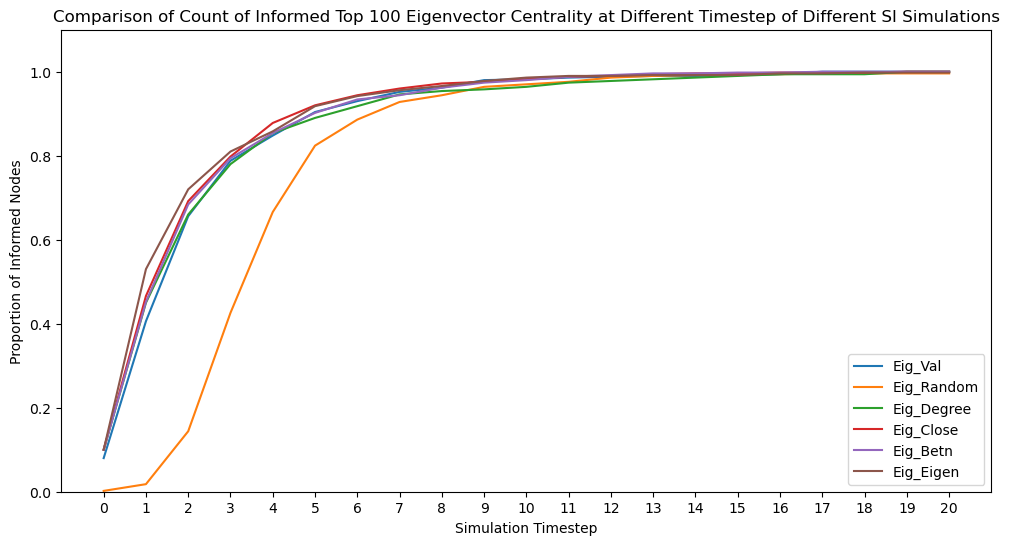

In [46]:
# Plot of Quantitative Metric
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
df_res[['Eig_Val', 'Eig_Random', 'Eig_Degree', 'Eig_Close', 'Eig_Betn',
        'Eig_Eigen']].plot(ax=ax)
ax.set_title('Comparison of Count of Informed Top 100 Eigenvector Centrality '
             'at Different Timestep of Different SI Simulations')
ax.set_ylabel('Proportion of Informed Nodes')
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(0, 21, 1))
ax.set_xlabel('Simulation Timestep')
ax.legend(loc='lower right')
plt.show()

## Simulation with Industry Context

In [47]:
# Clean the industry column
df_final2['Industry'] = df_final2['Industry'].str.replace(
    'Artificial intelligence', 'Artificial Intelligence')

In [48]:
# Create a dictionary where key=investor, values=industry it invests in
dict_state_industry = {node: []
                       for node in list(df_final2['Investor'].unique())}
for i in range(df_final2.shape[0]):
    dict_state_industry[df_final2.loc[i, 'Investor']].append(
        df_final2.loc[i, 'Industry'])
dict_investor_industry = {key: set(value)
                          for key, value in dict_state_industry.items()}

In [49]:
def si_simulation_industry(graph, df_state, industry_startup, beta_low,
                           beta_high, num_steps):
    # Initialize output containers and the list of investors with same industry
    same_industry_investor = [investor for investor, industry in
                              dict_investor_industry.items(
                              ) if industry_startup in industry]
    same_industry_set = set(same_industry_investor)
    sus_count = []
    inf_count = []
    ind_count = []

    # At t=0, save metrics
    sus_count.append(df_state['State'].value_counts(1)[0])
    inf_count.append(df_state['State'].value_counts(1)[1])
    informed_node = set(
        df_state.loc[df_state['State'] == 1, 'Investors'].tolist())
    ind_count.append(len(same_industry_set.intersection(
        informed_node))/len(same_industry_set))

    # Simulation loop
    for _ in trange(num_steps):
        for i in range(df_state.shape[0]):
            if df_state.loc[i, 'State'] == 1:
                informed_node = df_state.loc[i, 'Investors']
                for neighbor_node in graph.neighbors(informed_node):
                    # Adjust the beta to high beta if both the informed node and the neighbor node are in the same industry of the startup
                    if informed_node in same_industry_set and neighbor_node in same_industry_set:
                        beta = beta_high
                    else:
                        beta = beta_low
                    if df_state.loc[df_state['Investors'] == neighbor_node, 'State'].values[0] == 0 and random.random() < beta:
                        df_state.loc[df_state['Investors']
                                     == neighbor_node, 'State'] = 1

        # Quantity Metric (How many nodes are informed?)
        sus_count.append(df_state['State'].value_counts(1)[0])
        inf_count.append(df_state['State'].value_counts(1)[1])

        # Quality Metric (How many of those informed are part of investor from the startup industry)
        informed_node = set(
            df_state.loc[df_state['State'] == 1, 'Investors'].tolist())
        ind_count.append(len(same_industry_set.intersection(
            informed_node))/len(same_industry_set))

    return sus_count, inf_count, ind_count


def plot_si_simulation_industry(total_count, sus_count, inf_count, ind_count):
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    ax.plot(range(len(sus_count)), sus_count, label="% Susceptible Investors")
    ax.plot(range(len(inf_count)), inf_count, label="% Informed Investors")
    ax.plot(range(len(ind_count)), ind_count,
            label="% Informed Same Industry Investors")
    ax.set_xlabel("Time Step")
    ax.set_ylabel("Proportion of Nodes")
    ax.set_title("Susceptible-Informed (SI) Simulation")
    ax.legend(loc='lower right')
    plt.show()

In [50]:
# Initialize variables
num_steps = 20
beta_high = 0.10
beta_low = 0.01
num_initial_investors = 10
sample_industry = 'Artificial Intelligence'

# Final Dataframe of output
df_res_ind = pd.DataFrame()

### Scenario 6: Random 10 Investors in the same Industry

100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


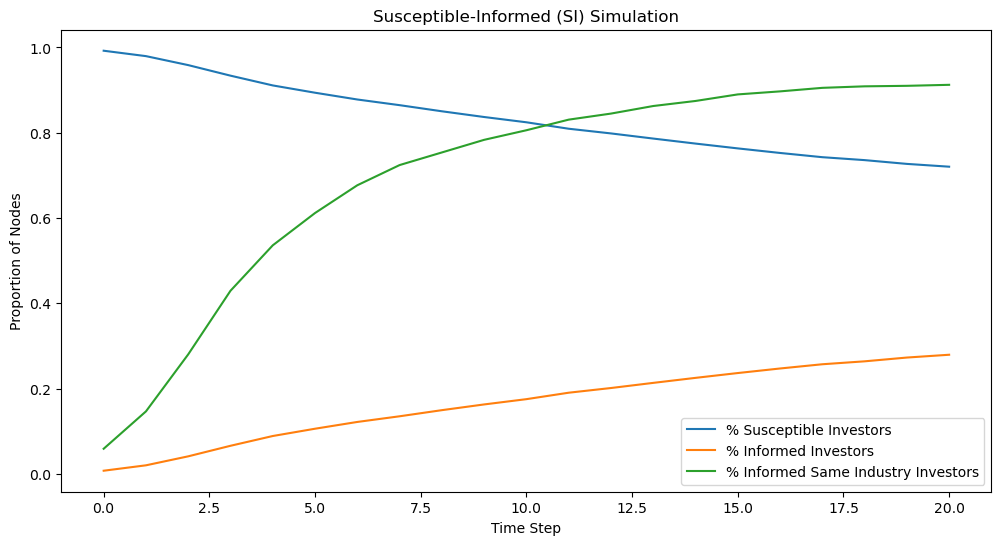

In [51]:
# Multiple runs to get the average simulation results
df_sus_random_ind = pd.DataFrame()
df_inf_random_ind = pd.DataFrame()
df_ind_random_ind = pd.DataFrame()
for i in range(1, 6):
    # Setup initial informed investors
    initial_random_ind = initial_investors(investor_projection,
                                           ls_source=None,
                                           ls_len=num_initial_investors,
                                           industry_startup=sample_industry)
    df_state_random_ind = initialize_states(investor_projection,
                                            initial_random_ind)

    # Simulate
    sus_random_ind, inf_random_ind, ind_random_ind = si_simulation_industry(
        investor_projection, df_state_random_ind, 'Artificial Intelligence',
        beta_low, beta_high, num_steps)
    df_sus_random_ind[f'Trial {i}'] = sus_random_ind
    df_inf_random_ind[f'Trial {i}'] = inf_random_ind
    df_ind_random_ind[f'Trial {i}'] = ind_random_ind

# Calculate average and save to results
df_res_ind['Sus_Random'] = df_sus_random_ind.mean(axis=1)
df_res_ind['Inf_Random'] = df_inf_random_ind.mean(axis=1)
df_res_ind['Ind_Random'] = df_ind_random_ind.mean(axis=1)

# Plot
plot_si_simulation_industry(df_res.shape[0], df_res_ind['Sus_Random'],
                            df_res_ind['Inf_Random'], df_res_ind['Ind_Random'])

### Scenario 7: Investors of Top Valued Startups in the same Industry

100%|██████████| 20/20 [00:19<00:00,  1.00it/s]


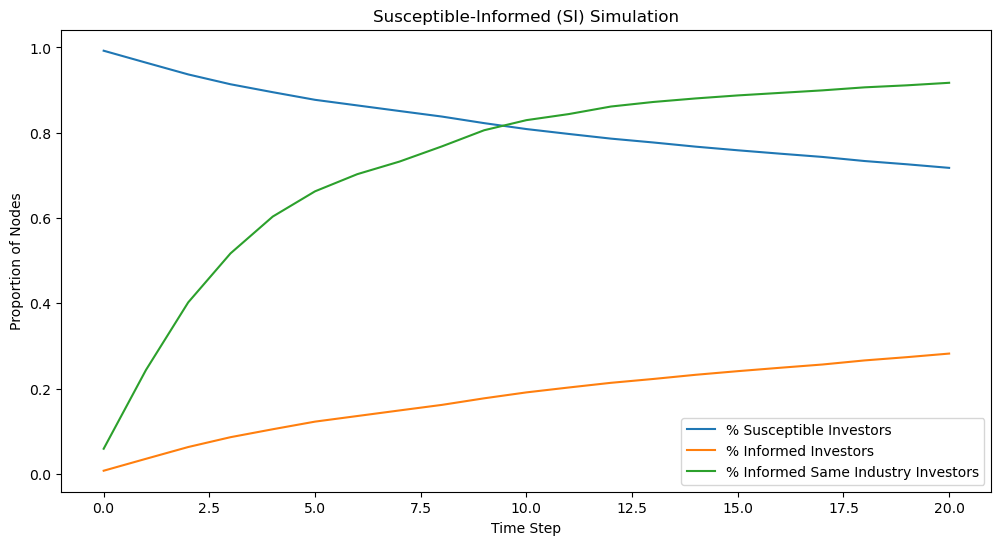

In [52]:
# Multiple runs to get the average simulation results
df_sus_val_ind = pd.DataFrame()
df_inf_val_ind = pd.DataFrame()
df_ind_val_ind = pd.DataFrame()
for i in range(1, 6):
    # Setup initial informed investors
    initial_val_ind = initial_investors(investor_projection,
                                        ls_source=ls_valuation,
                                        ls_len=num_initial_investors,
                                        industry_startup=sample_industry)
    df_state_val_ind = initialize_states(investor_projection, initial_val_ind)

    # Simulate
    sus_val_ind, inf_val_ind, ind_val_ind = si_simulation_industry(
        investor_projection, df_state_val_ind, 'Artificial Intelligence',
        beta_low, beta_high, num_steps)
    df_sus_val_ind[f'Trial {i}'] = sus_val_ind
    df_inf_val_ind[f'Trial {i}'] = inf_val_ind
    df_ind_val_ind[f'Trial {i}'] = ind_val_ind

# Calculate average and save to results
df_res_ind['Sus_Val'] = df_sus_val_ind.mean(axis=1)
df_res_ind['Inf_Val'] = df_inf_val_ind.mean(axis=1)
df_res_ind['Ind_Val'] = df_ind_val_ind.mean(axis=1)

# Plot
plot_si_simulation_industry(df_res.shape[0], df_res_ind['Sus_Val'],
                            df_res_ind['Inf_Val'], df_res_ind['Ind_Val'])

### Scenario 8: Top 10 Eigenvector Centrality in the same Industry

100%|██████████| 20/20 [00:20<00:00,  1.02s/it]


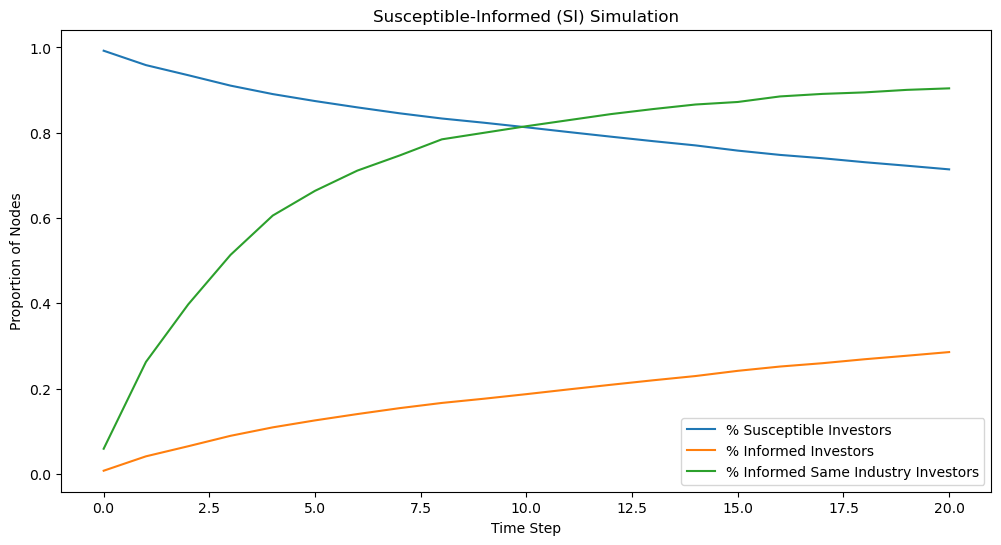

In [53]:
# Multiple runs to get the average simulation results
df_sus_eigen_ind = pd.DataFrame()
df_inf_eigen_ind = pd.DataFrame()
df_ind_eigen_ind = pd.DataFrame()
for i in range(1, 6):
    # Setup initial informed investors
    initial_eigen_ind = initial_investors(investor_projection,
                                          ls_source=df_eigen['index'].tolist(),
                                          ls_len=num_initial_investors,
                                          industry_startup=sample_industry)
    df_state_eigen_ind = initialize_states(investor_projection,
                                           initial_eigen_ind)

    # Simulate
    sus_eigen_ind, inf_eigen_ind, ind_eigen_ind = si_simulation_industry(
        investor_projection, df_state_eigen_ind, 'Artificial Intelligence',
        beta_low, beta_high, num_steps)
    df_sus_eigen_ind[f'Trial {i}'] = sus_eigen_ind
    df_inf_eigen_ind[f'Trial {i}'] = inf_eigen_ind
    df_ind_eigen_ind[f'Trial {i}'] = ind_eigen_ind

# Calculate average and save to results
df_res_ind['Sus_Eigen'] = df_sus_eigen_ind.mean(axis=1)
df_res_ind['Inf_Eigen'] = df_inf_eigen_ind.mean(axis=1)
df_res_ind['Ind_Eigen'] = df_ind_eigen_ind.mean(axis=1)

# Plot
plot_si_simulation_industry(df_res.shape[0], df_res_ind['Sus_Eigen'],
                            df_res_ind['Inf_Eigen'], df_res_ind['Ind_Eigen'])

### Scenario Comparisons

In [54]:
df_res_ind = df_res_ind[['Sus_Random', 'Sus_Val', 'Sus_Eigen',
                         'Inf_Random', 'Inf_Val', 'Inf_Eigen',
                         'Ind_Random', 'Ind_Val', 'Ind_Eigen']]
display(df_res_ind)

Sus_Random   Sus_Val  Sus_Eigen  Inf_Random   Inf_Val  Inf_Eigen  \
0     0.992366  0.992366   0.992366    0.007634  0.007634   0.007634   
1     0.979695  0.964427   0.958626    0.020305  0.035573   0.041374   
2     0.958626  0.936794   0.934962    0.041374  0.063206   0.065038   
3     0.933893  0.913740   0.910534    0.066107  0.086260   0.089466   
4     0.910992  0.895115   0.890687    0.089008  0.104885   0.109313   
5     0.893893  0.877252   0.874351    0.106107  0.122748   0.125649   
6     0.878015  0.864122   0.859542    0.121985  0.135878   0.140458   
7     0.864733  0.850992   0.845649    0.135267  0.149008   0.154351   
8     0.850382  0.838015   0.833435    0.149618  0.161985   0.166565   
9     0.836947  0.822595   0.823511    0.163053  0.177405   0.176489   
10    0.824580  0.808702   0.812824    0.175420  0.191298   0.187176   
11    0.809466  0.797252   0.801679    0.190534  0.202748   0.198321   
12    0.798473  0.786260   0.790840    0.201527  0.213740   0.209160   
13    0.786412  0.777252   0.780305    0.213588  0.222748   0.219695   
14    0.774656  0.767481   0.770382    0.225344  0.232519   0.229618   
15    0.763359  0.758931   0.758168    0.236641  0.241069   0.241832   
16    0.752672  0.750992   0.748092    0.247328  0.249008   0.251908   
17    0.742748  0.743359   0.740305    0.257252  0.256641   0.259695   
18    0.735878  0.733740   0.730992    0.264122  0.266260   0.269008   
19    0.727023  0.726107   0.722748    0.272977  0.273893   0.277252   
20    0.720458  0.717710   0.714198    0.279542  0.282290   0.285802   

    Ind_Random   Ind_Val  Ind_Eigen  
0     0.059172  0.059172   0.059172  
1     0.146746  0.243787   0.262722  
2     0.280473  0.402367   0.397633  
3     0.429586  0.517160   0.513609  
4     0.536095  0.603550   0.605917  
5     0.611834  0.662722   0.663905  
6     0.676923  0.702959   0.711243  
7     0.724260  0.732544   0.746746  
8     0.753846  0.768047   0.784615  
9     0.783432  0.805917   0.800000  
10    0.805917  0.829586   0.815385  
11    0.830769  0.843787   0.829586  
12    0.844970  0.861538   0.843787  
13    0.862722  0.872189   0.855621  
14    0.874556  0.880473   0.866272  
15    0.889941  0.887574   0.872189  
16    0.897041  0.893491   0.885207  
17    0.905325  0.899408   0.891124  
18    0.908876  0.906509   0.894675  
19    0.910059  0.911243   0.900592  
20    0.912426  0.917160   0.904142

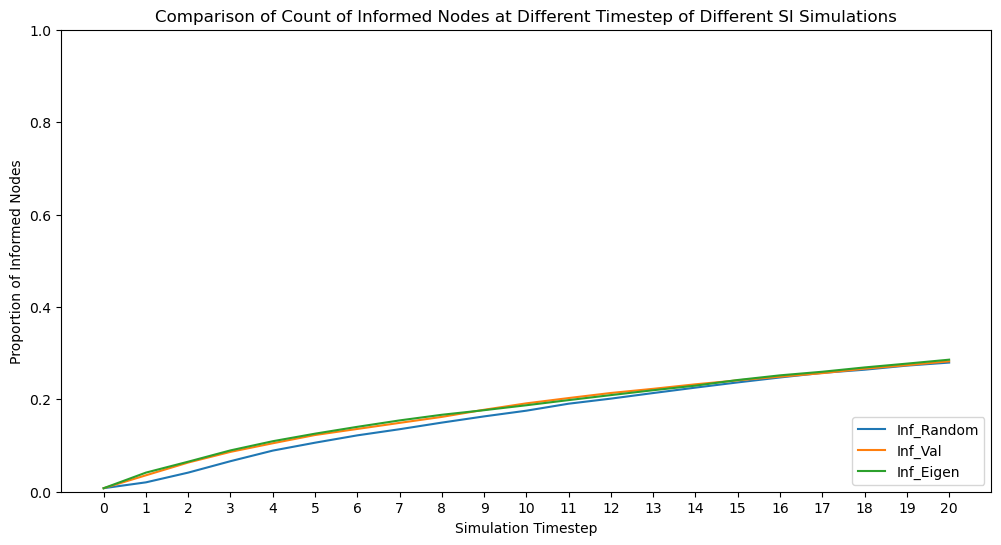

In [55]:
# Plot of Qualitative Metric
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
df_res_ind[['Inf_Random', 'Inf_Val', 'Inf_Eigen']].plot(ax=ax)
ax.set_title('Comparison of Count of Informed Nodes at Different Timestep of '
             'Different SI Simulations')
ax.set_ylabel('Proportion of Informed Nodes')
ax.set_ylim(0, 1)
ax.set_xticks(np.arange(0, 21, 1))
ax.set_xlabel('Simulation Timestep')
ax.legend(loc='lower right')
plt.show()

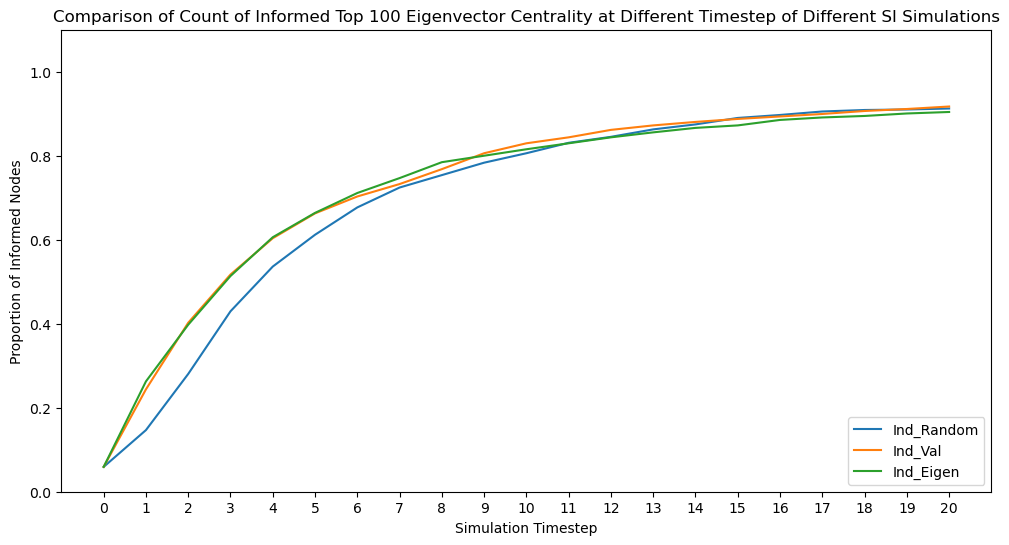

In [56]:
# Plot of Quantitative Metric
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
df_res_ind[['Ind_Random', 'Ind_Val', 'Ind_Eigen']].plot(ax=ax)
ax.set_title('Comparison of Count of Informed Top 100 Eigenvector Centrality '
             'at Different Timestep of Different SI Simulations')
ax.set_ylabel('Proportion of Informed Nodes')
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(0, 21, 1))
ax.set_xlabel('Simulation Timestep')
ax.legend(loc='lower right')
plt.show()